In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pywt
import scipy

In [3]:
mode = pywt.Modes.smooth

In [4]:
data = pywt.data.ecg()

(1024,)
(516,)
(262,)
(135,)
(72,)


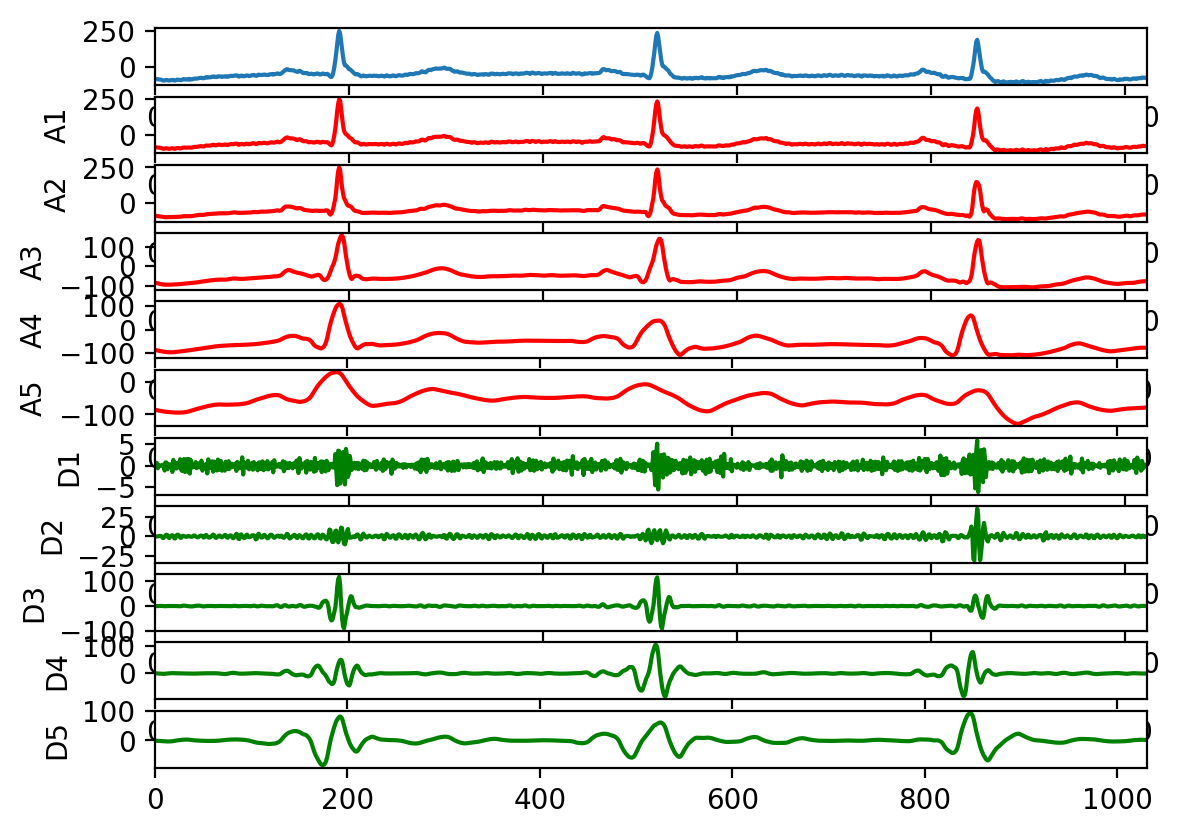

In [5]:
w = pywt.Wavelet('sym5')
a = data
ca = []
cd = []
for i in range(5):
    print(a.shape)
    (a, d) = pywt.dwt(a, w, mode)
    ca.append(a)
    cd.append(d)

rec_a = []
rec_d = []

for i, coeff in enumerate(ca):
    coeff_list = [coeff, None] + [None] * i
    rec_a.append(pywt.waverec(coeff_list, w))

for i, coeff in enumerate(cd):
    coeff_list = [None, coeff] + [None] * i
    rec_d.append(pywt.waverec(coeff_list, w))

fig, axes = plt.subplots(nrows=1 + len(rec_a)+ len(rec_d))
ax = axes[0]
ax.plot(data)
ax.set_xlim(0, len(data) - 1)
ax_idx = 1

for i, y in enumerate(rec_a):
    ax = axes[ax_idx]
    ax.plot(y, 'r')
    ax.set_xlim(0, len(y) - 1)
    ax.set_ylabel("A%d" % (i + 1))
    
    ax_idx += 1
    

for i, y in enumerate(rec_d):
    ax = axes[ax_idx]
    ax.plot(y, 'g')
    ax.set_xlim(0, len(y) - 1)
    ax.set_ylabel("D%d" % (i + 1))
    
    ax_idx += 1
    


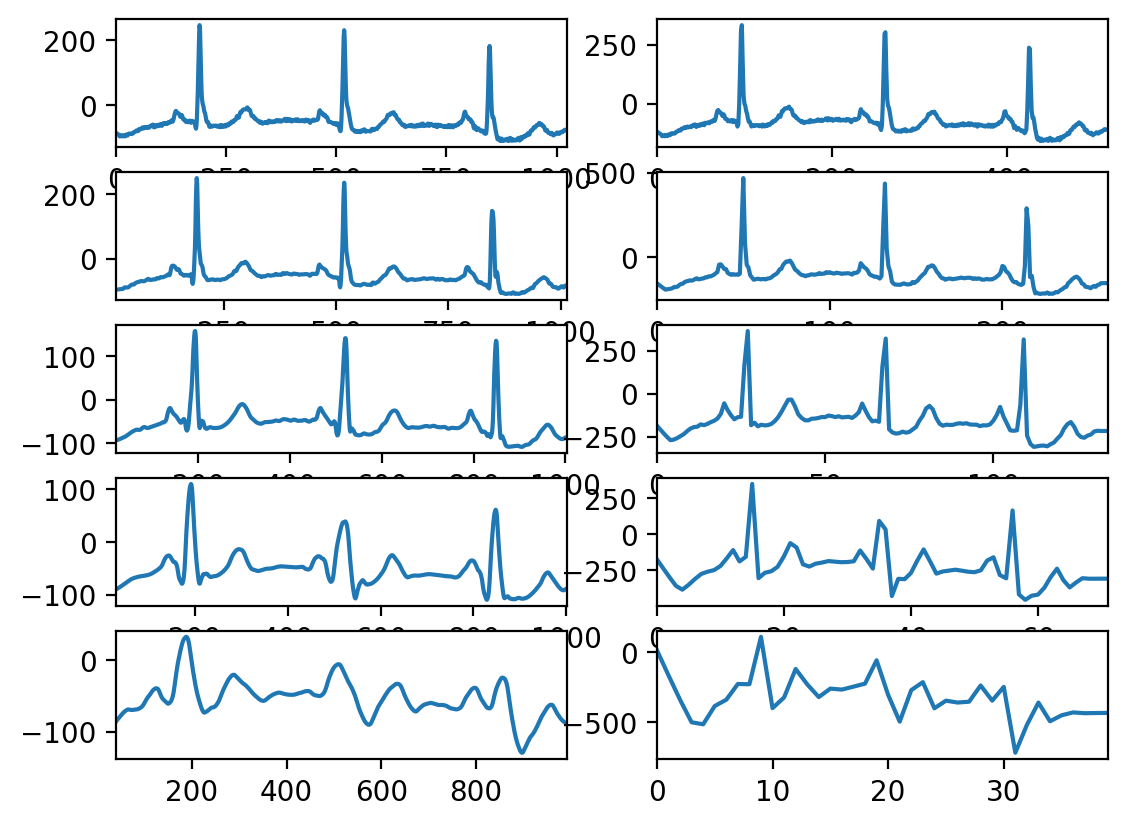

In [6]:
fig, axes = plt.subplots(nrows=len(rec_a), ncols=2)
for i, x, in enumerate(rec_a):
    
    ax = axes[i, 0]
    ax.plot(x)
    ax.set_xlim(w.dec_len * i, len(x) - 1 - w.dec_len * i)
    
    x2 = ca[i]
    ax = axes[i, 1]
    ax.plot(x2)
    ax.set_xlim(0, len(x2) - 1)

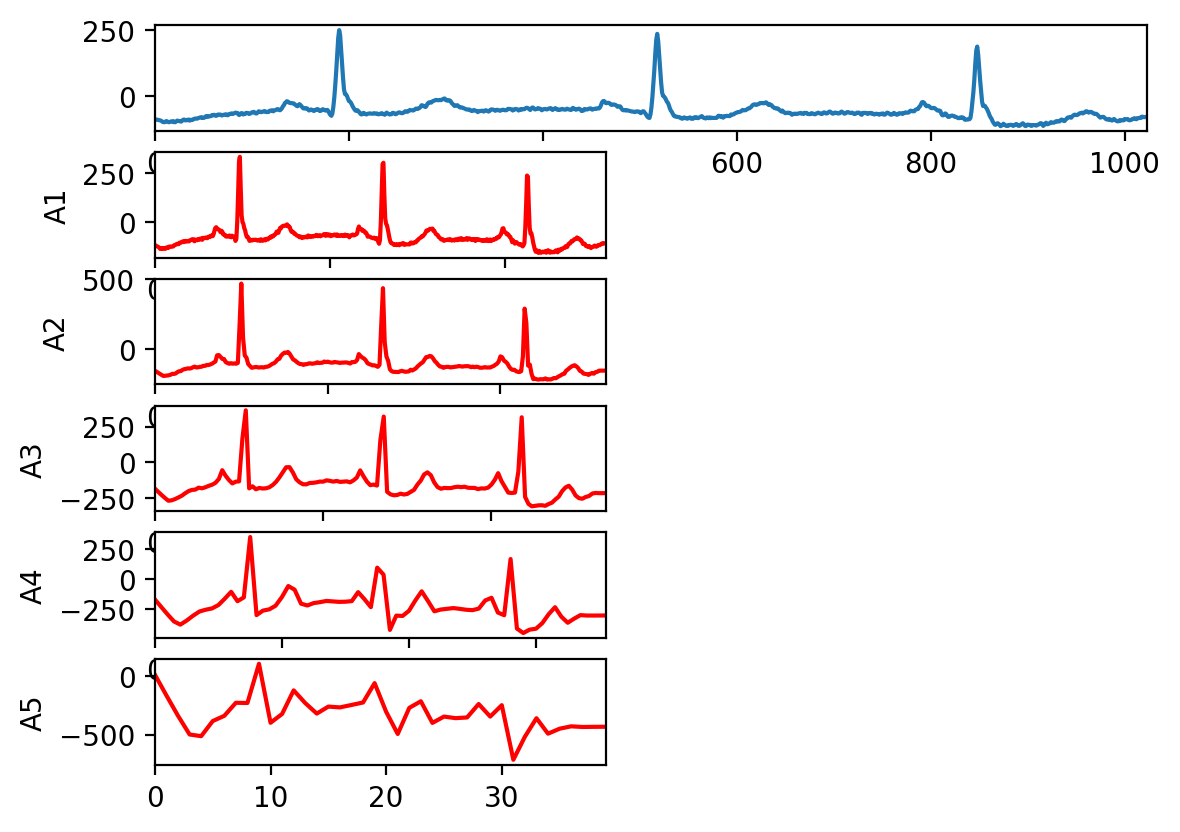

In [7]:
fig = plt.figure()
ax_main = fig.add_subplot(len(ca) + 1, 1, 1)
ax_main.plot(data)
ax_main.set_xlim(0, len(data) - 1)

for i, x in enumerate(ca):
    ax = fig.add_subplot(len(ca) + 1, 2, 3 + i * 2)
    ax.plot(x, 'r')
    ax.set_ylabel("A%d" % (i + 1))
    
    ax.set_xlim(0, len(x) - 1)

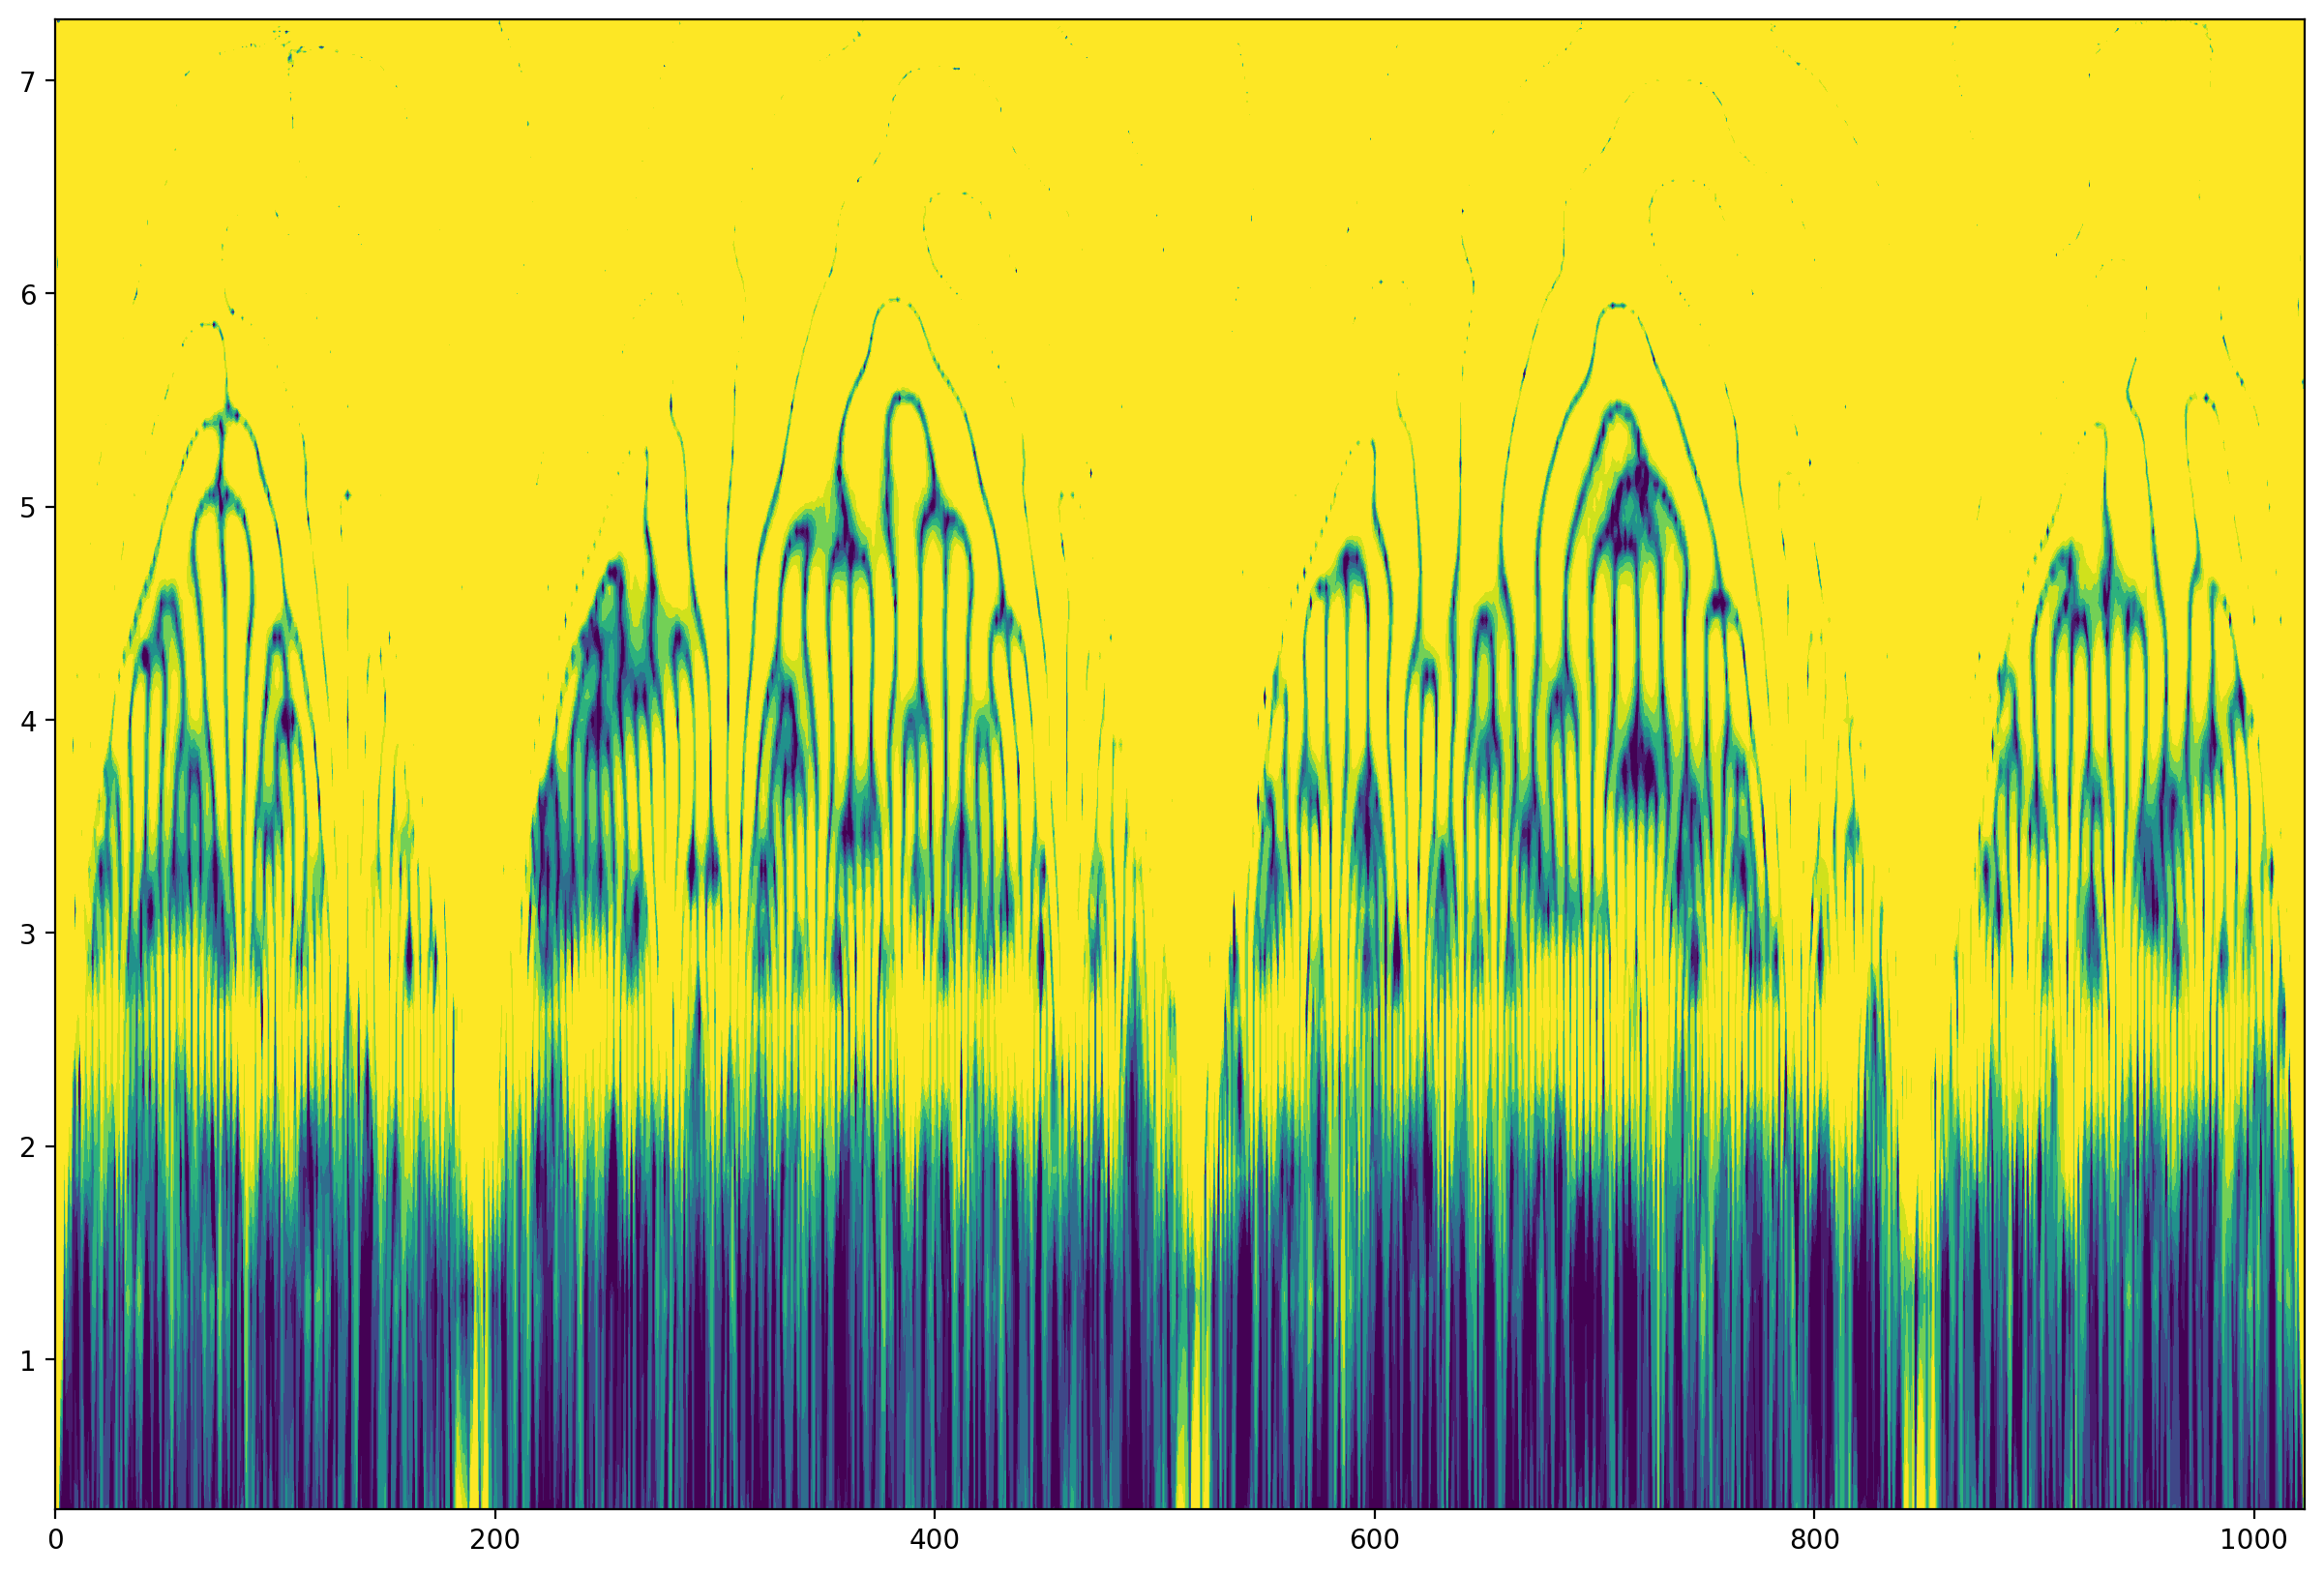

In [8]:
scales = np.arange(1, 128)
dt = 1

[cfs, frequencies] = pywt.cwt(data, scales, 'morl', dt)
power = (abs(cfs)) ** 2

time = np.arange(len(data))

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), 
            levels=np.log2(levels),
            extend='both')

In [11]:
data_folder = "../../data/william/dataset2/"
f_name = f'{data_folder}/preprocessed_data__no_decimate.csv'
df = pd.read_csv(f_name, index_col=0)
data_columns = np.nonzero([c.isnumeric() for c in df.columns])[0]

standing = df.loc[df.label=="standing"].iloc[:, data_columns].values
sitting = df.loc[df.label=="sitting"].iloc[:, data_columns].values

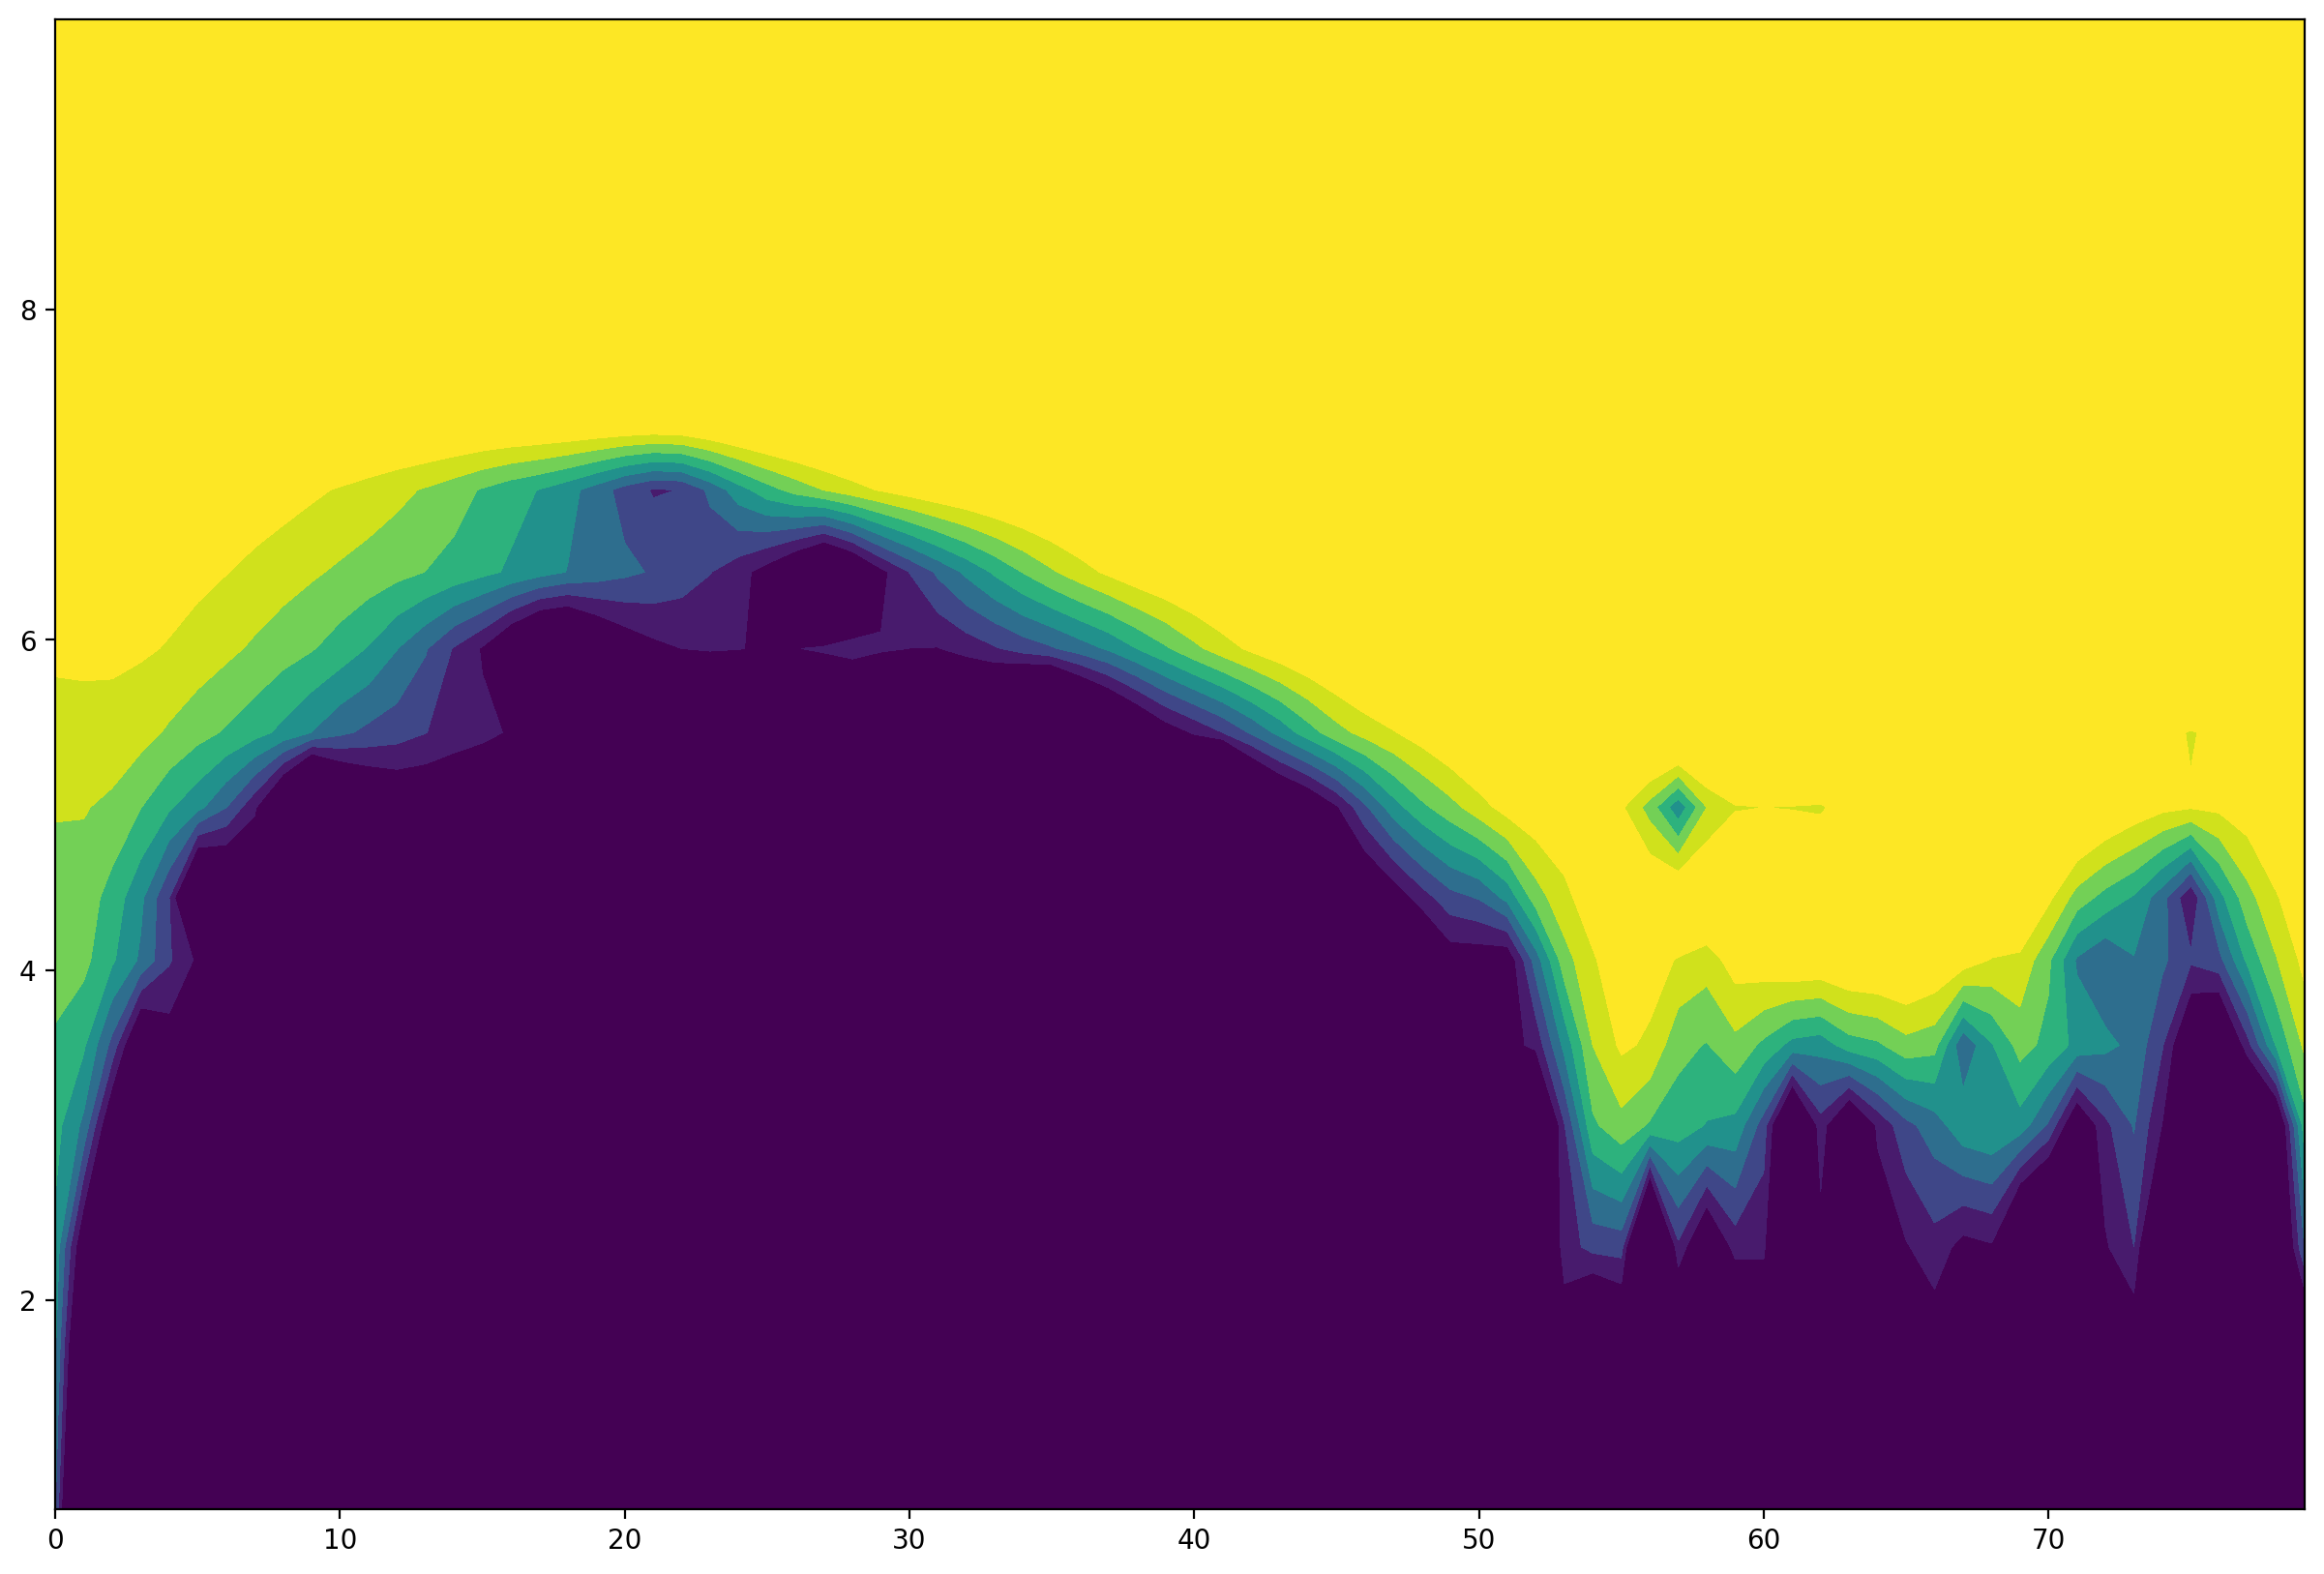

In [66]:
data = standing[0]
data = scipy.signal.decimate(data, q=5)
                      
scales = np.geomspace(1, 520, num=20, dtype=int)
dt = 1
wavelet = 'cgau6' # 'morl'

[cfs, frequencies] = pywt.cwt(data, scales, wavelet, dt)
power = (abs(cfs)) ** 2

period = 1. / frequencies

power = power[:, ::5]

time = np.arange(power.shape[1])


levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), 
            levels=np.log2(levels),
            extend='both')

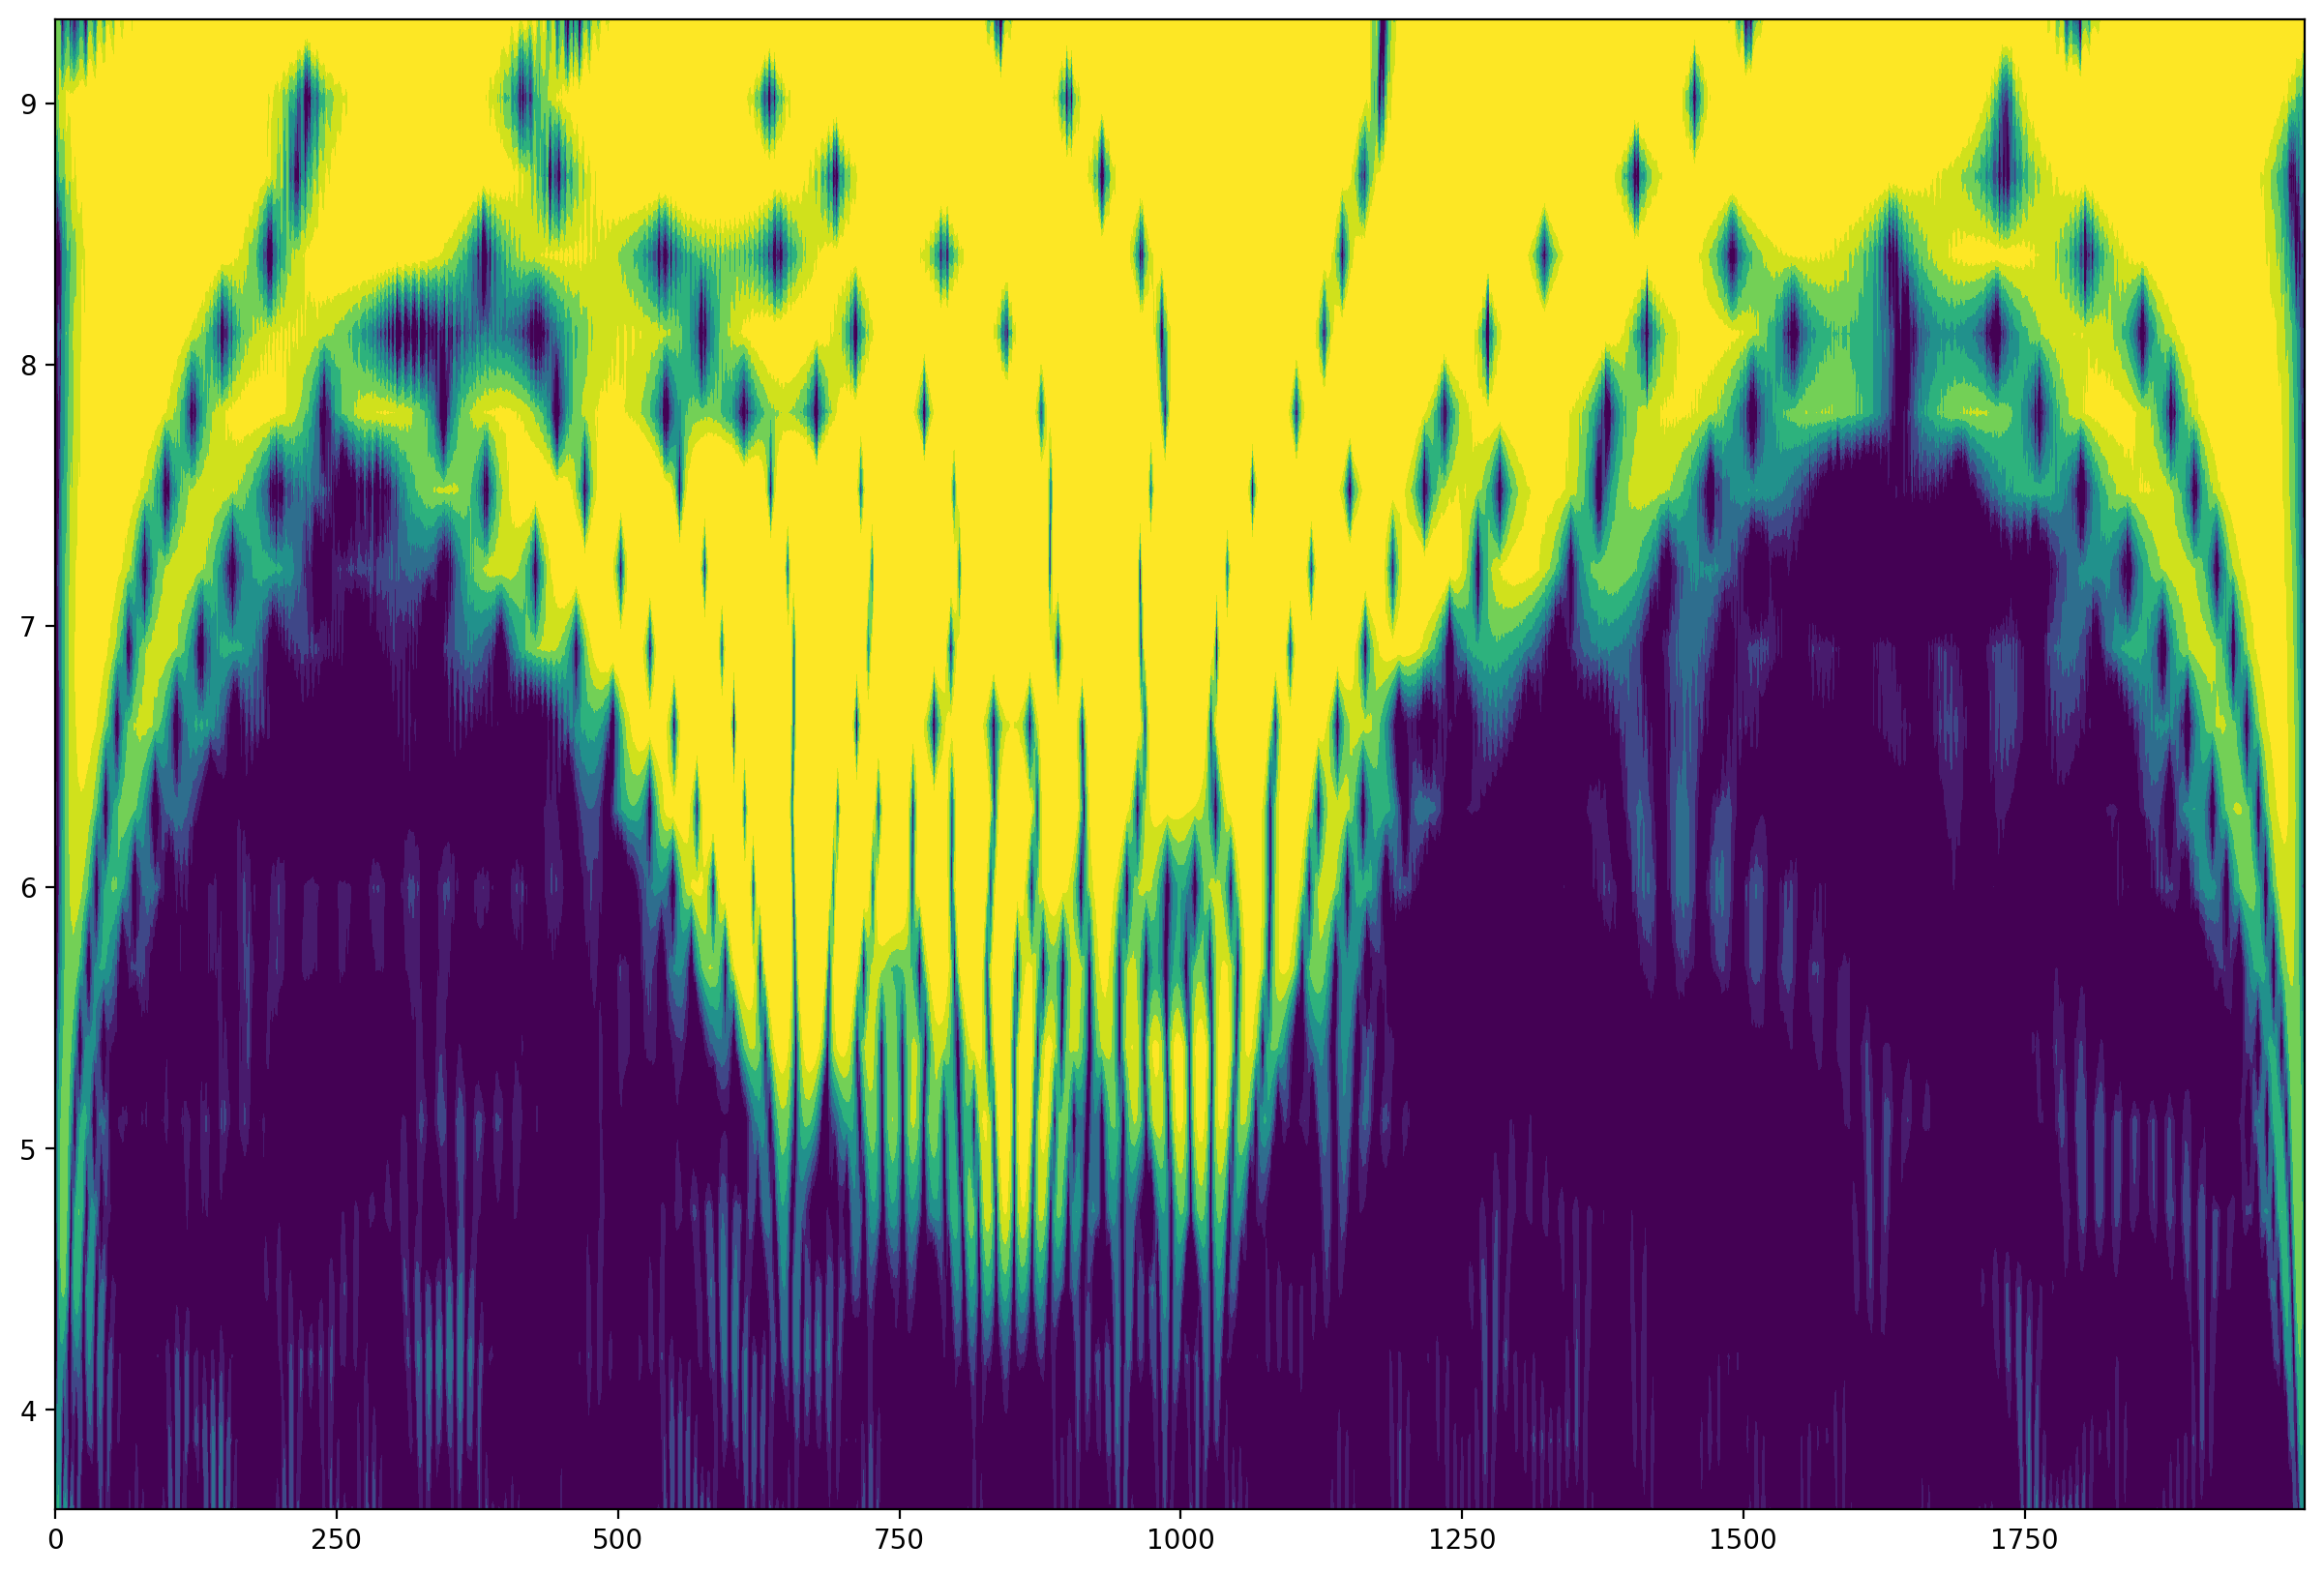

In [23]:
data = sitting[1]

scales = np.geomspace(10, 520, num=20, dtype=int)
dt = 1

[cfs, frequencies] = pywt.cwt(data, scales, 'morl', dt)
power = (abs(cfs)) ** 2



time = np.arange(len(data))

period = 1. / frequencies
levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
f, ax = plt.subplots(figsize=(15, 10))
ax.contourf(time, np.log2(period), np.log2(power), 
            levels=np.log2(levels),
            extend='both')

In [12]:
def remove_axis_decorations(axes):

    for ax in axes.flatten():
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

In [13]:
fig_folder = "../../fig/william/wavelet"

10


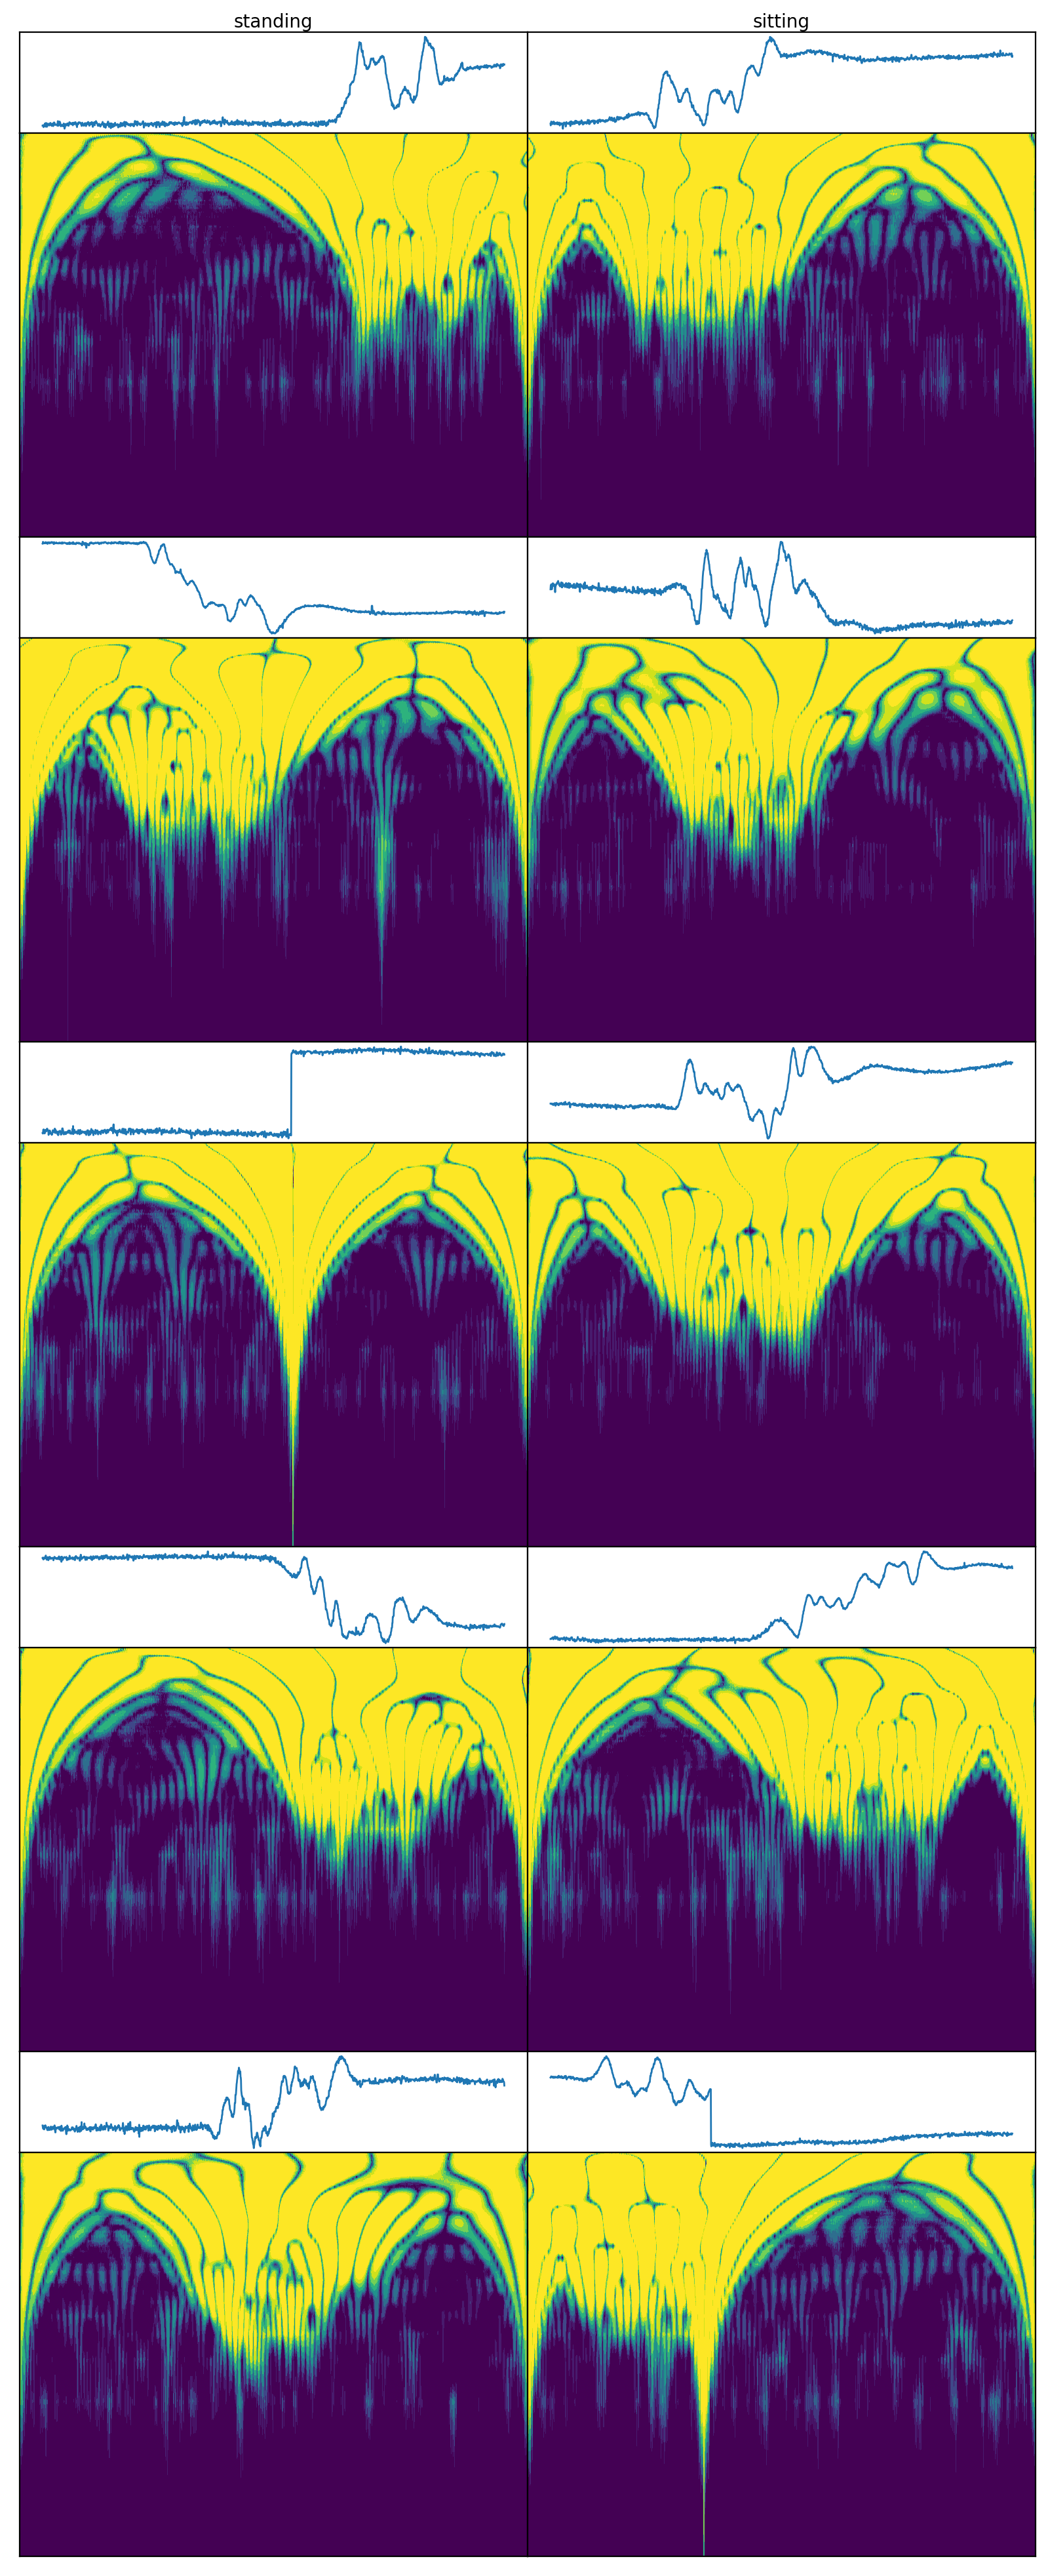

In [21]:
def remove_axis_decorations(axes):

    for ax in axes.flatten():
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])

labels = list(df.label.unique())
n = 5
scales = np.arange(1, 520, 10)
dt = 1
wavelet = 'morl' #'cgau1'  #'morl'

single_plot_size = 5

data_columns = np.nonzero([c.isnumeric() for c in df.columns])[0]

height_ratios = []
for _ in range(n):
    height_ratios += [1, 4]
    
print(len(height_ratios))

fig, axes = plt.subplots(
    figsize=(single_plot_size*2, single_plot_size*n),
    nrows=len(height_ratios),
    ncols=len(labels),
    height_ratios=height_ratios)

remove_axis_decorations(axes)
fig.subplots_adjust(wspace=0, hspace=0)

for column, label in enumerate(labels):
    for i in range(0, n*2, 2):
        
        x = df[df.label==label].iloc[i//2, data_columns].values.astype(np.float64)

        ax = axes[i, column]
        ax.plot(x, lw=1.0)
        
        ax = axes[i+1, column]
            
        [cfs, frequencies] = pywt.cwt(x, scales, wavelet, dt)
        power = cfs**2

        time = np.arange(len(data))

        period = 1. / frequencies
        levels = [0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]
        ax.contourf(time, np.log2(period), np.log2(power), 
                    levels=np.log2(levels),
                    extend='both')

    ax = axes[0, column]
    ax.text(0.5, 1.1, label,
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)

In [15]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [16]:
cfs.shape

(64, 40)

In [17]:
power = (abs(cfs)) ** 2

In [18]:
period.shape

(64,)

In [19]:
scales.shape

(64,)

In [20]:
from scipy.fft import fft

In [21]:
data_folder = "../../data/william/"
f_name = f'{data_folder}/preprocessed_data__no_decimate.csv'
df = pd.read_csv(f_name, index_col=0)

standing = df.loc[df.label=="standing"].iloc[:, 1:].values
sitting = df.loc[df.label=="sitting"].iloc[:, 1:].values

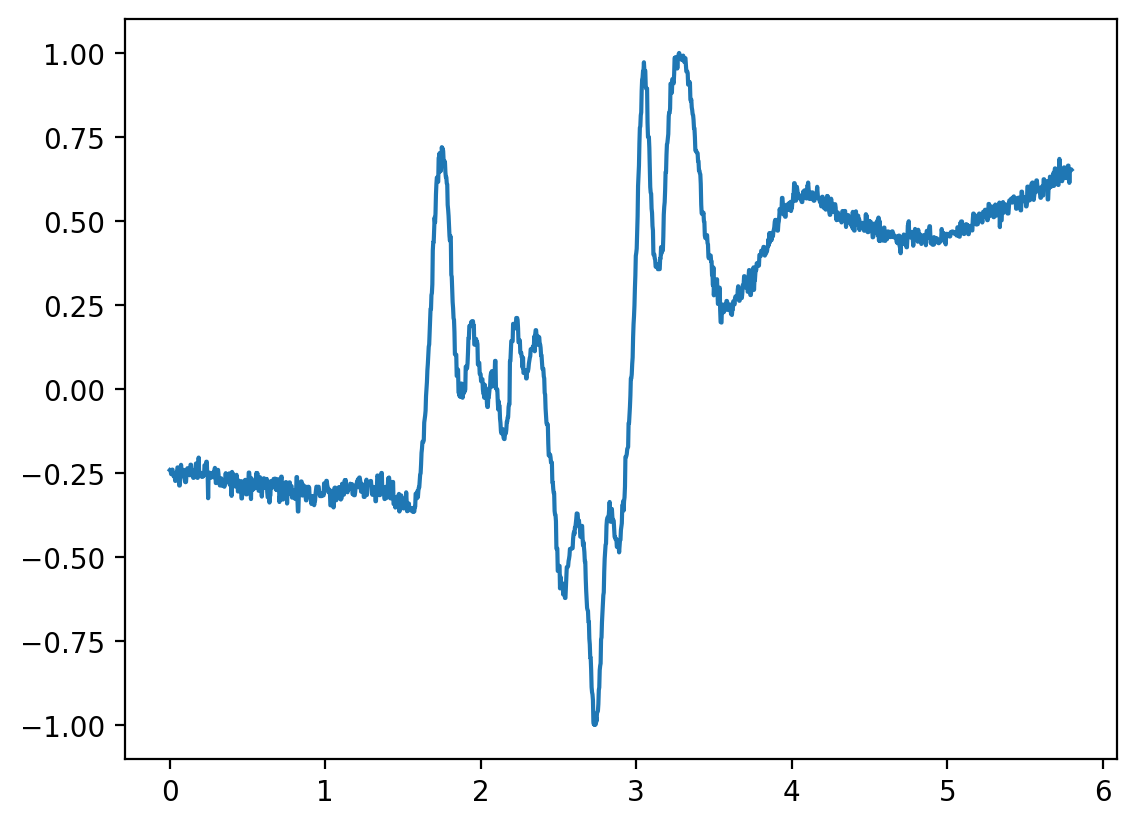

In [22]:
y = sitting[0]
total_time = 5.8
n = len(y)
f_s = n/total_time
x = np.linspace(0, total_time, n)
plt.plot(x, y)

(-10.0, 10.0)

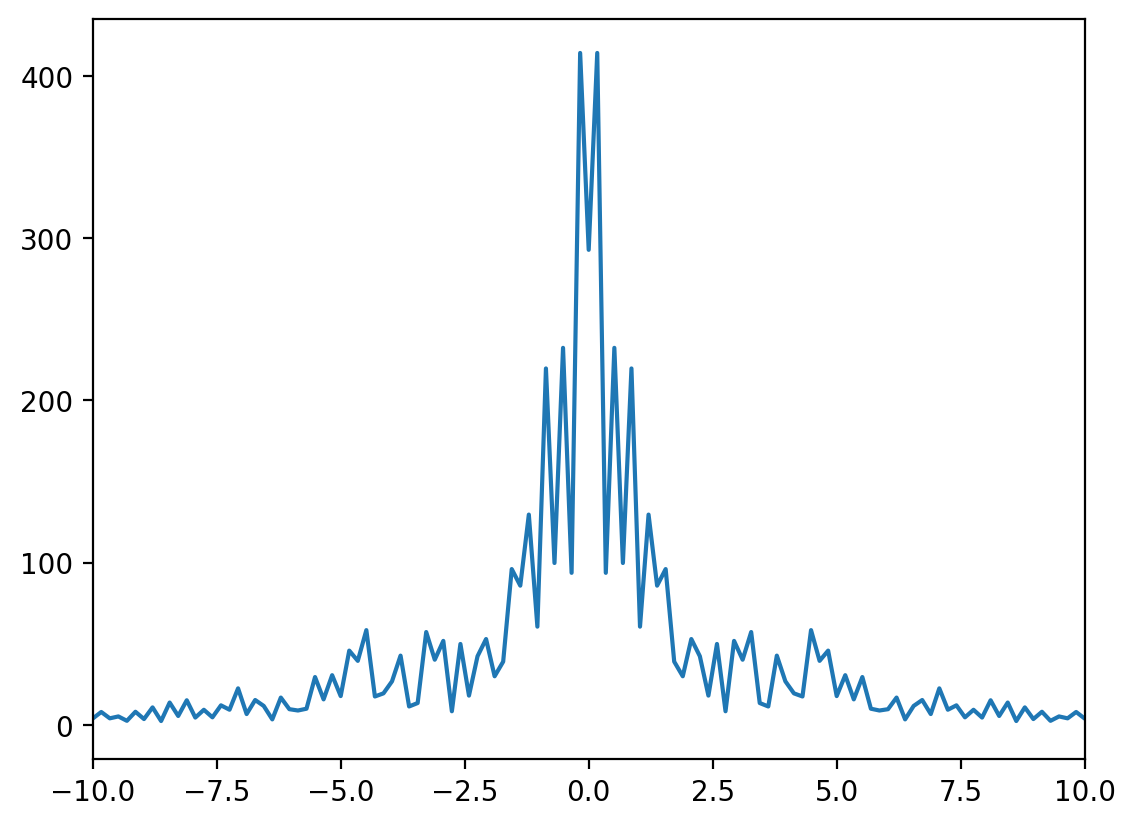

In [23]:
yf = np.fft.fftshift(scipy.fftpack.fft(y))
xf = np.fft.fftshift(scipy.fftpack.fftfreq(len(x), 1/f_s))
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
ax.set_xlim(-10, 10)

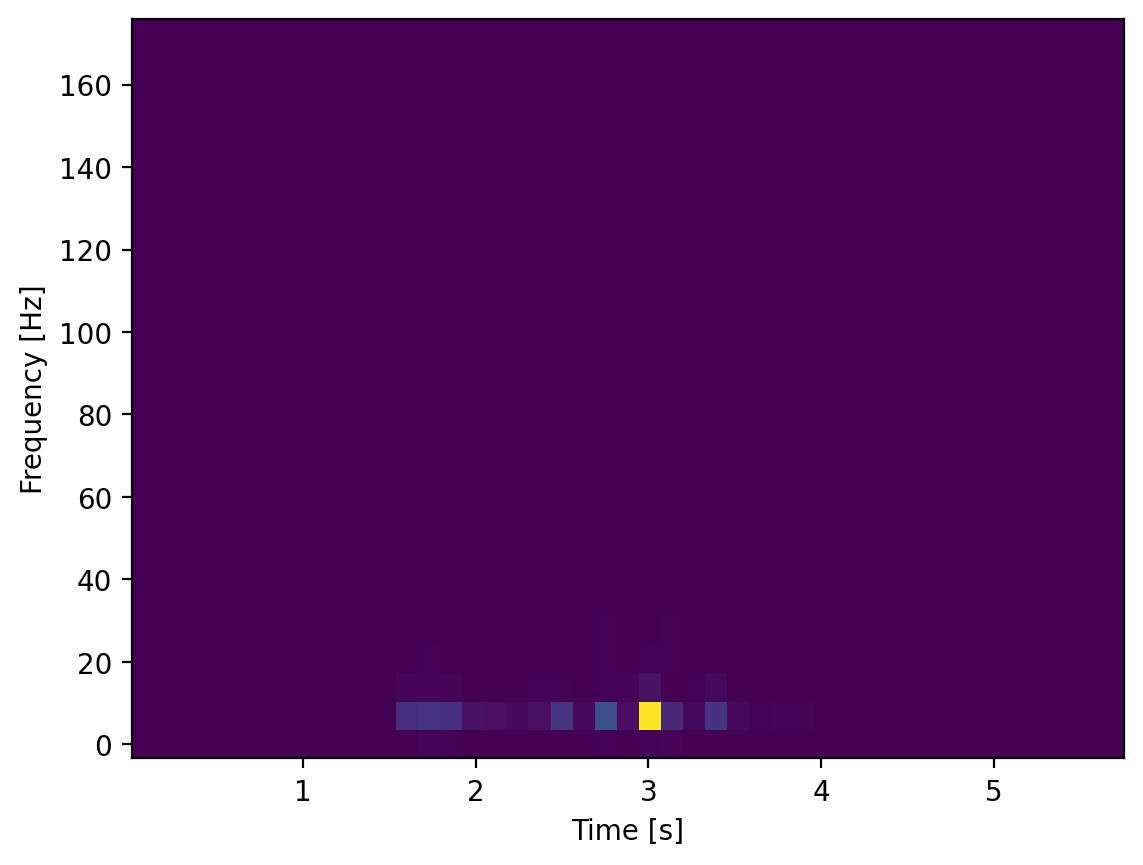

In [24]:
f, ax = plt.subplots()

freqs, times, Sx = scipy.signal.spectrogram(
    y,
    fs=f_s,
    nperseg=50)

ax.pcolormesh(times, freqs, Sx)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [s]');

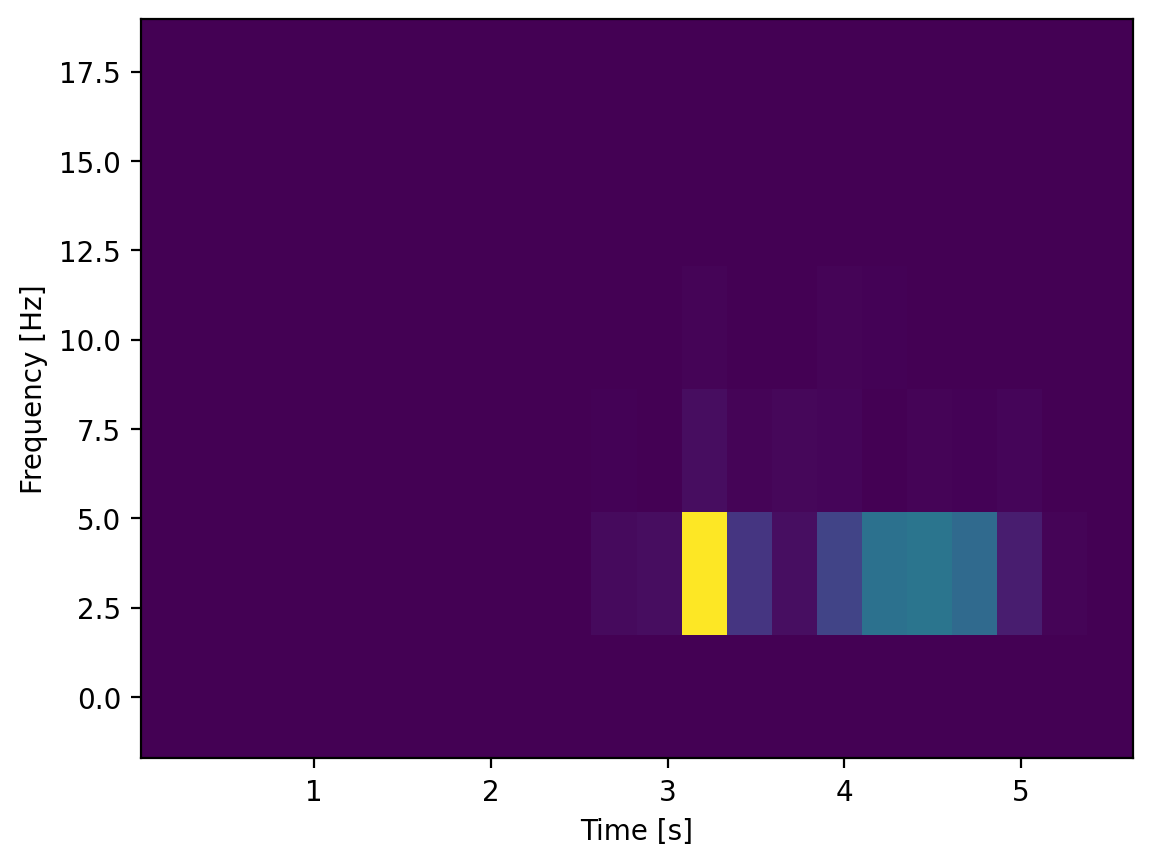

In [30]:
f, ax = plt.subplots()

f, times, Sx = scipy.signal.spectrogram(
    y,
    fs=f_s,
    nperseg=100)

fmin = 0 # Hz
fmax = 20 # Hz

freq_slice = np.where((f >= fmin) & (f <= fmax))

ax.pcolormesh(times, f[freq_slice], Sx[freq_slice])
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [s]');

10


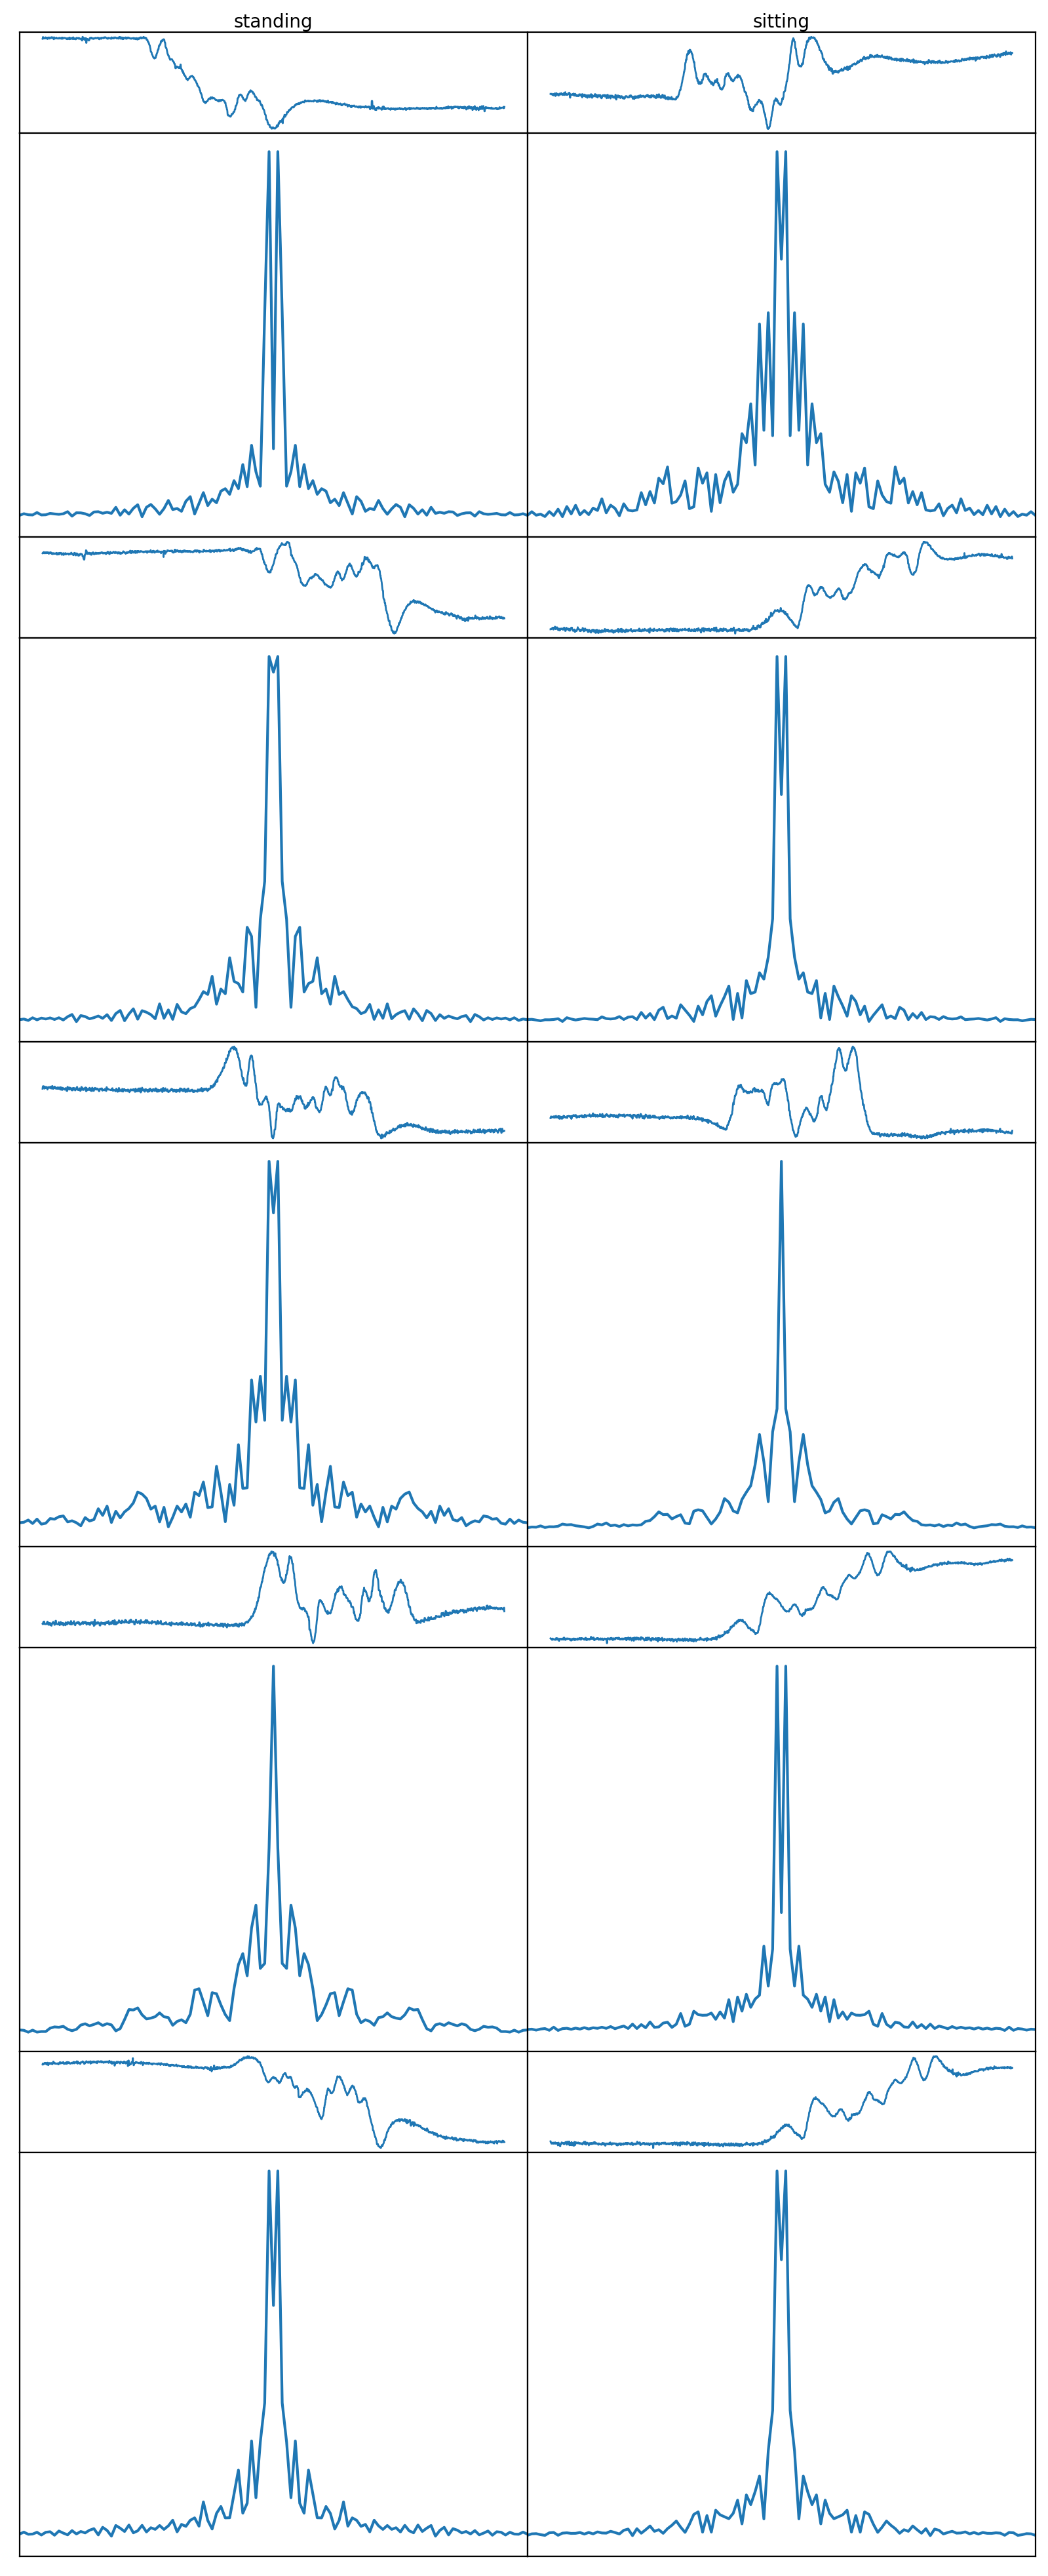

In [34]:
labels = list(df.label.unique())
n_display = 5

single_plot_size = 5

height_ratios = []
for _ in range(n_display):
    height_ratios += [1, 4]
    
print(len(height_ratios))

fig, axes = plt.subplots(
    figsize=(single_plot_size*2, single_plot_size*n_display),
    nrows=len(height_ratios),
    ncols=len(labels),
    height_ratios=height_ratios)

remove_axis_decorations(axes)
fig.subplots_adjust(wspace=0, hspace=0)

for column, label in enumerate(labels):
    for i in range(0, n_display*2, 2):
        
        y = df[df.label==label].iloc[i//2, 1:].values.astype(np.float64)

        ax = axes[i, column]
        x = np.linspace(0, total_time, n)
        ax.plot(x, y, lw=1.0)
        
        ax = axes[i+1, column]

        yf = np.fft.fftshift(scipy.fftpack.fft(y))
        xf = np.fft.fftshift(scipy.fftpack.fftfreq(len(x), 1/f_s))
        ax.plot(xf, np.abs(yf))
        
        ax.set_xlim(-10, 10)
    
    ax = axes[0, column]
    ax.text(0.5, 1.1, label,
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)

10


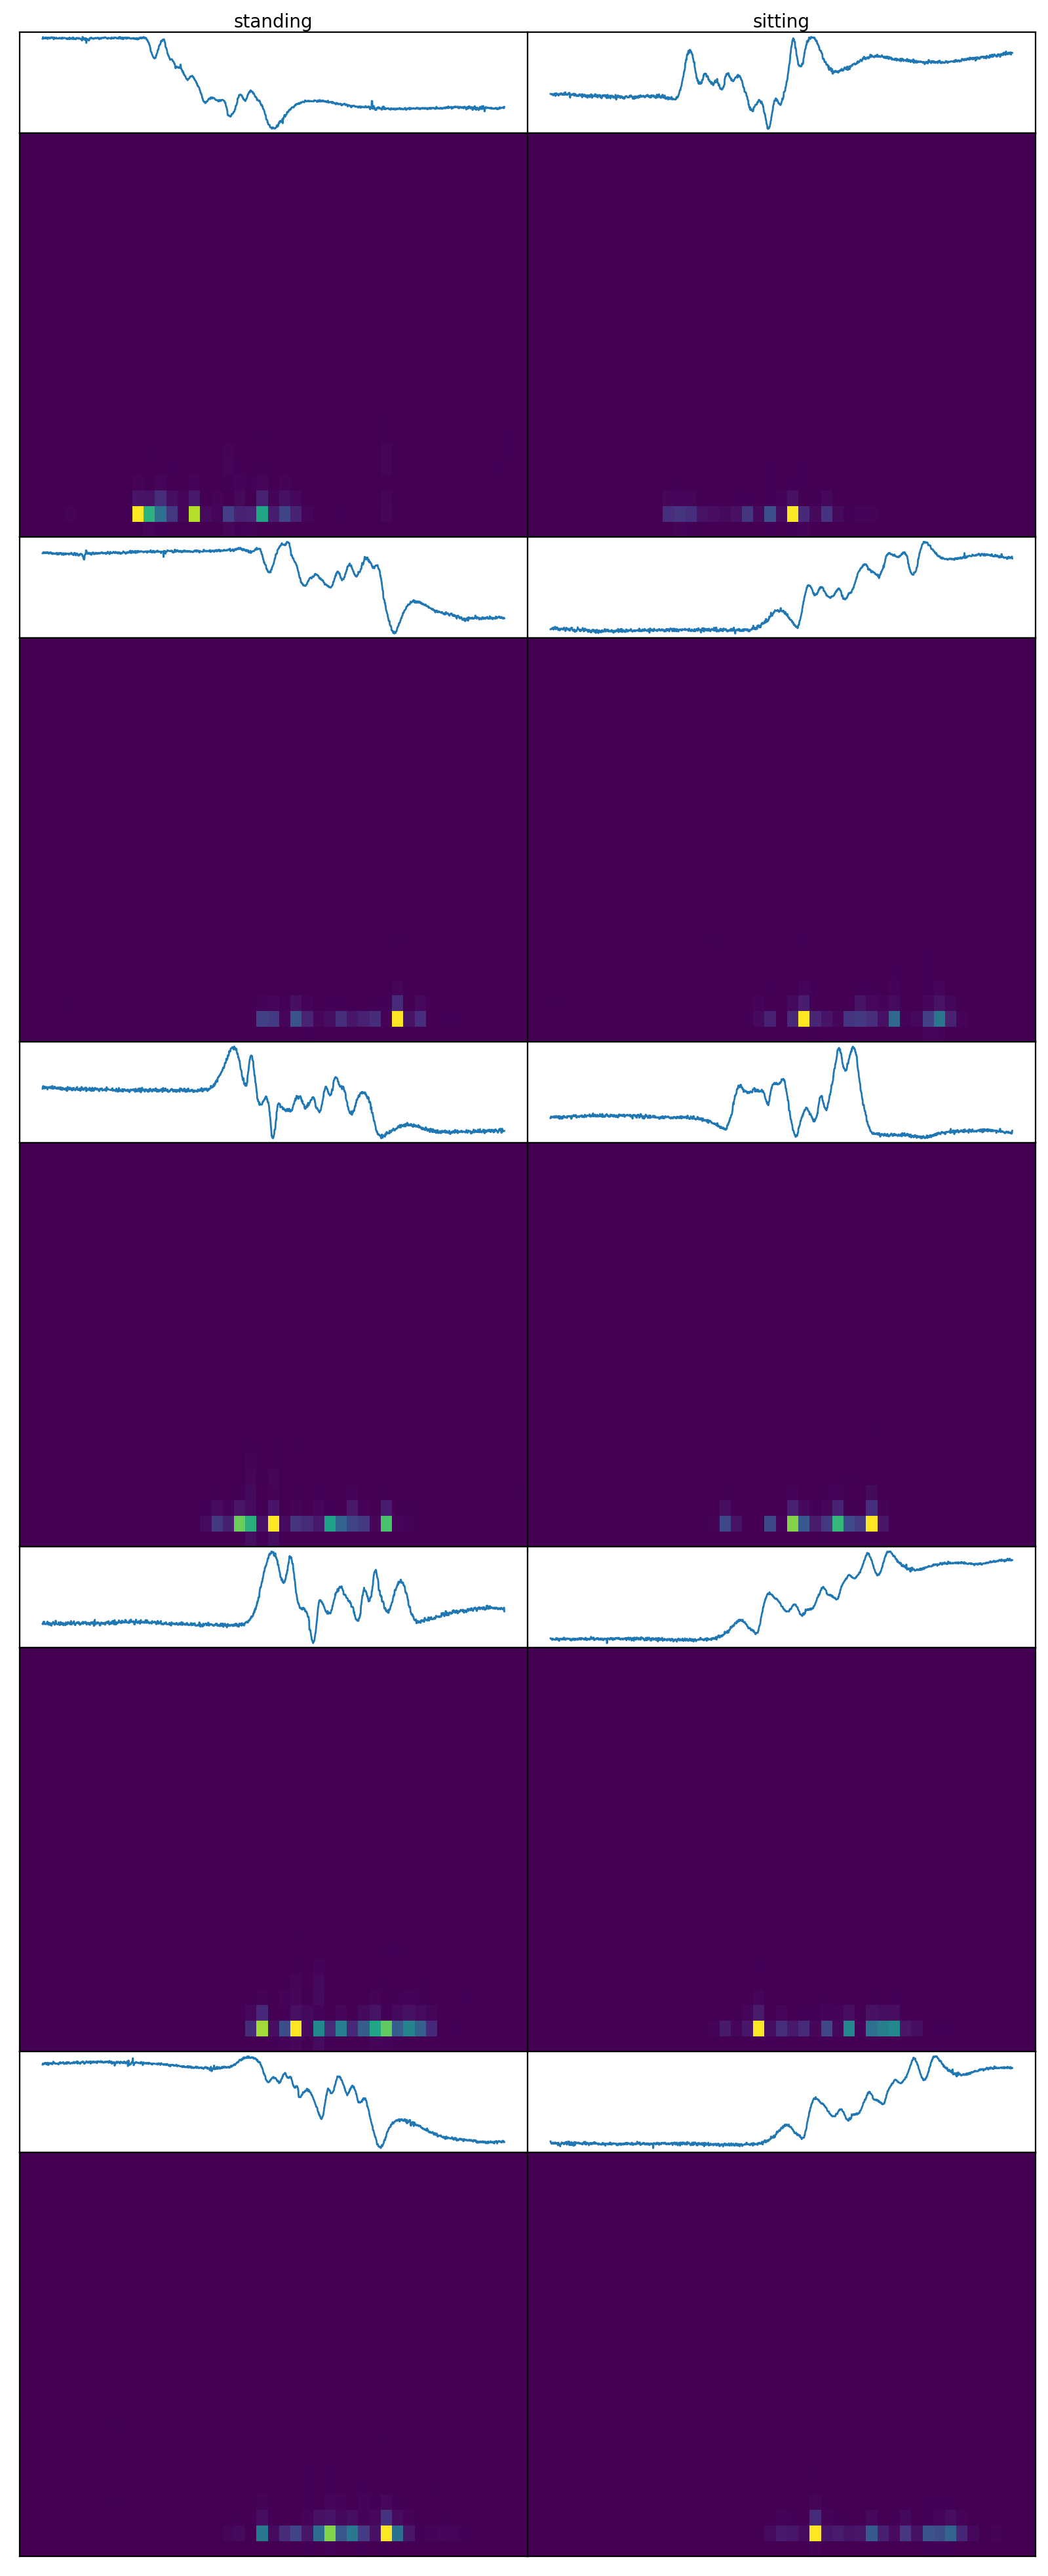

In [36]:
labels = list(df.label.unique())
n_display = 5

single_plot_size = 5

height_ratios = []
for _ in range(n_display):
    height_ratios += [1, 4]
    
print(len(height_ratios))

fig, axes = plt.subplots(
    figsize=(single_plot_size*2, single_plot_size*n_display),
    nrows=len(height_ratios),
    ncols=len(labels),
    height_ratios=height_ratios)

remove_axis_decorations(axes)
fig.subplots_adjust(wspace=0, hspace=0)

for column, label in enumerate(labels):
    for i in range(0, n_display*2, 2):
        
        y = df[df.label==label].iloc[i//2, 1:].values.astype(np.float64)

        ax = axes[i, column]
        x = np.linspace(0, total_time, n)
        ax.plot(x, y, lw=1.0)
        
        ax = axes[i+1, column]

        freqs, times, Sx = scipy.signal.spectrogram(
            y,
            fs=f_s,
            nperseg=50)

        ax.pcolormesh(times, freqs, Sx)

    ax = axes[0, column]
    ax.text(0.5, 1.1, label,
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)

In [ ]:
np.abs(fft(x)).shape

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

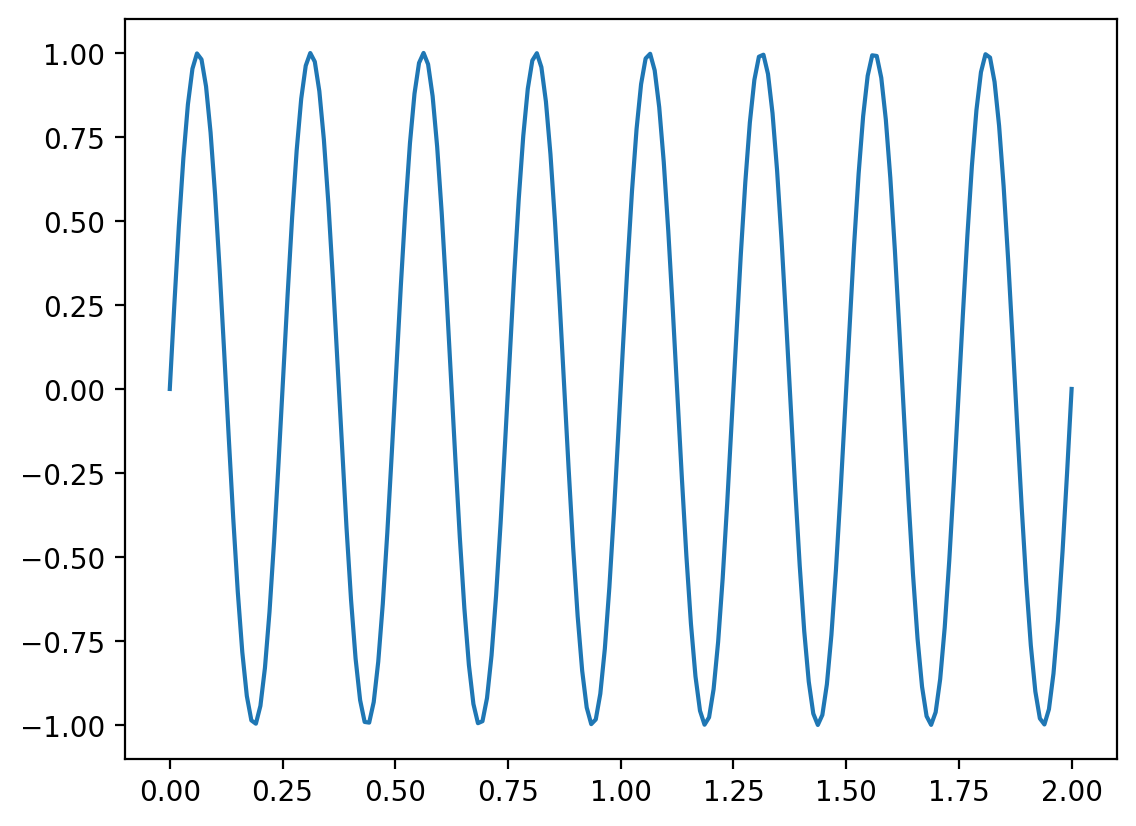

In [145]:
freq = 4

f_s = 100
# sample spacing
T = 2
x = np.linspace(0.0, T, f_s*T)
y = np.sin(x*2*np.pi*freq)


fig, ax = plt.subplots()
ax.plot(x, y);

200


(-50.0, 50.0)

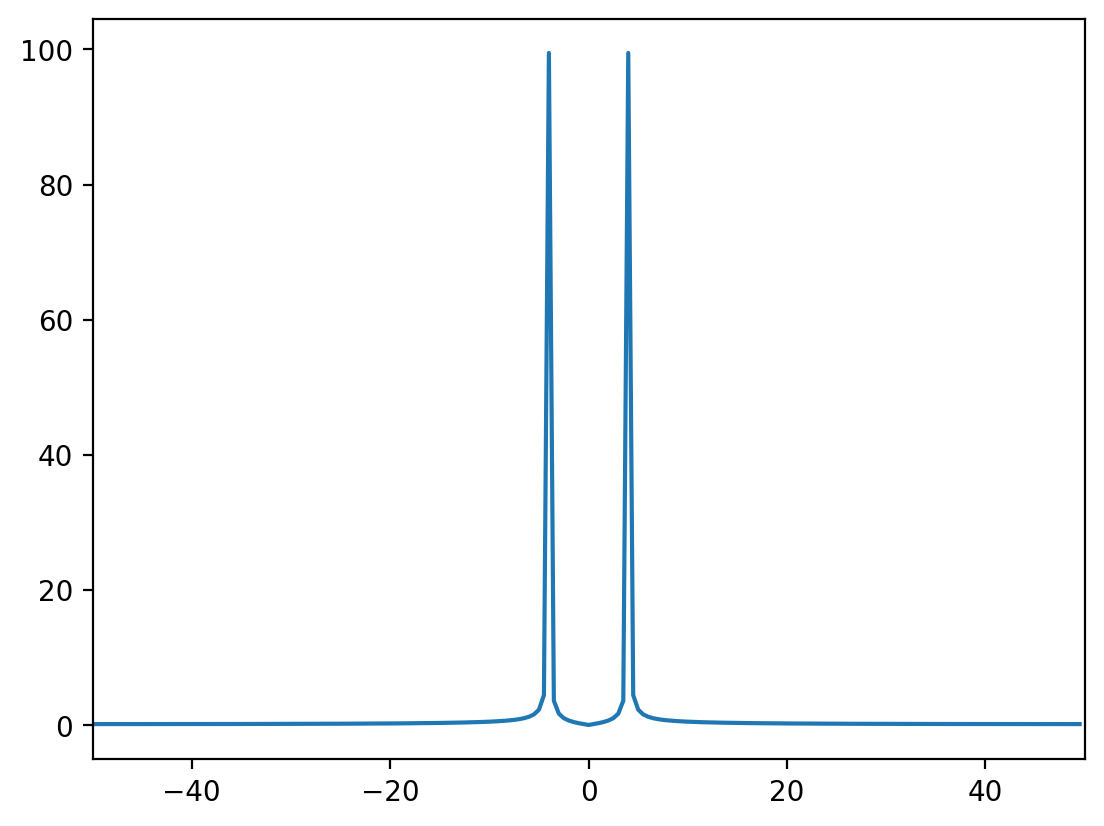

In [146]:
yf = np.fft.fftshift(scipy.fftpack.fft(y))
xf = np.fft.fftshift(scipy.fftpack.fftfreq(len(x), 1/f_s))
print(len(yf))

fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
ax.set_xlim(-f_s/2, +f_s/2)

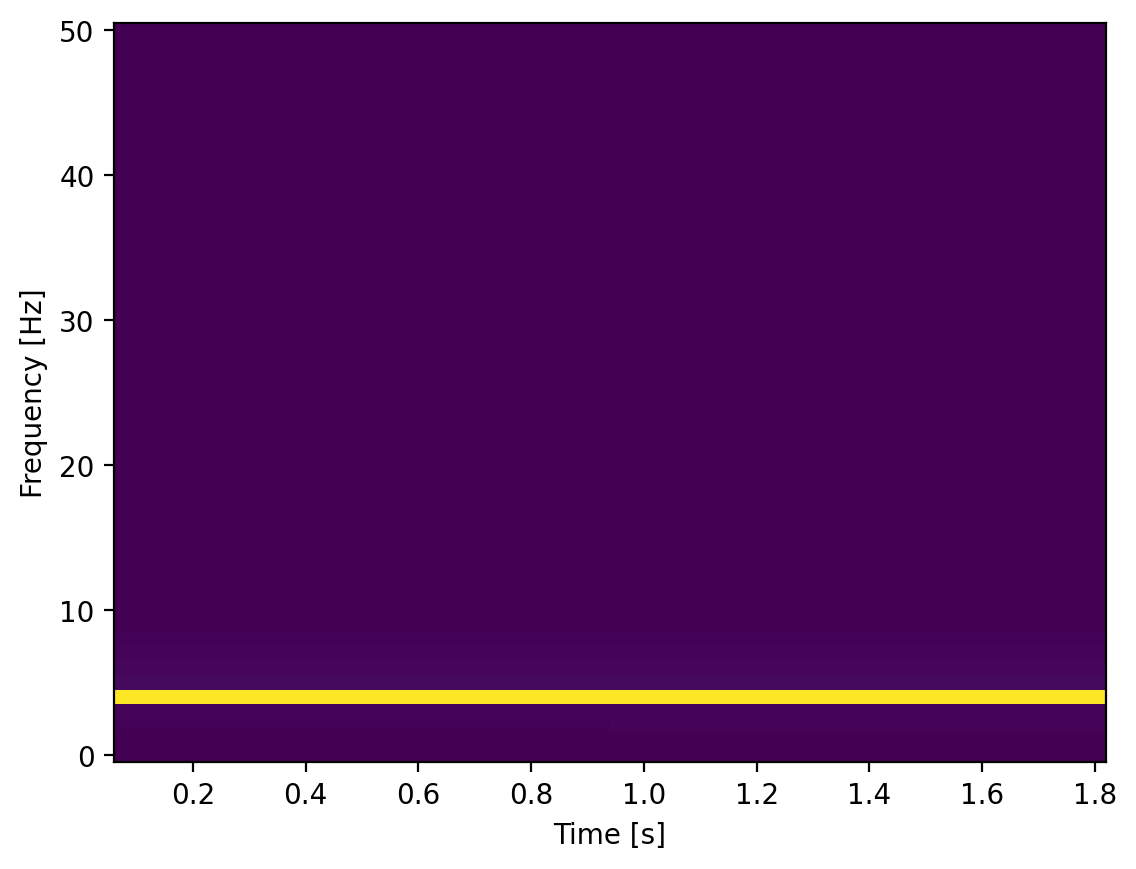

In [151]:
f, ax = plt.subplots()

freqs, times, Sx = scipy.signal.spectrogram(
    y,
    fs=f_s,
    nperseg=100)

ax.pcolormesh(times, freqs, Sx)
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [s]');

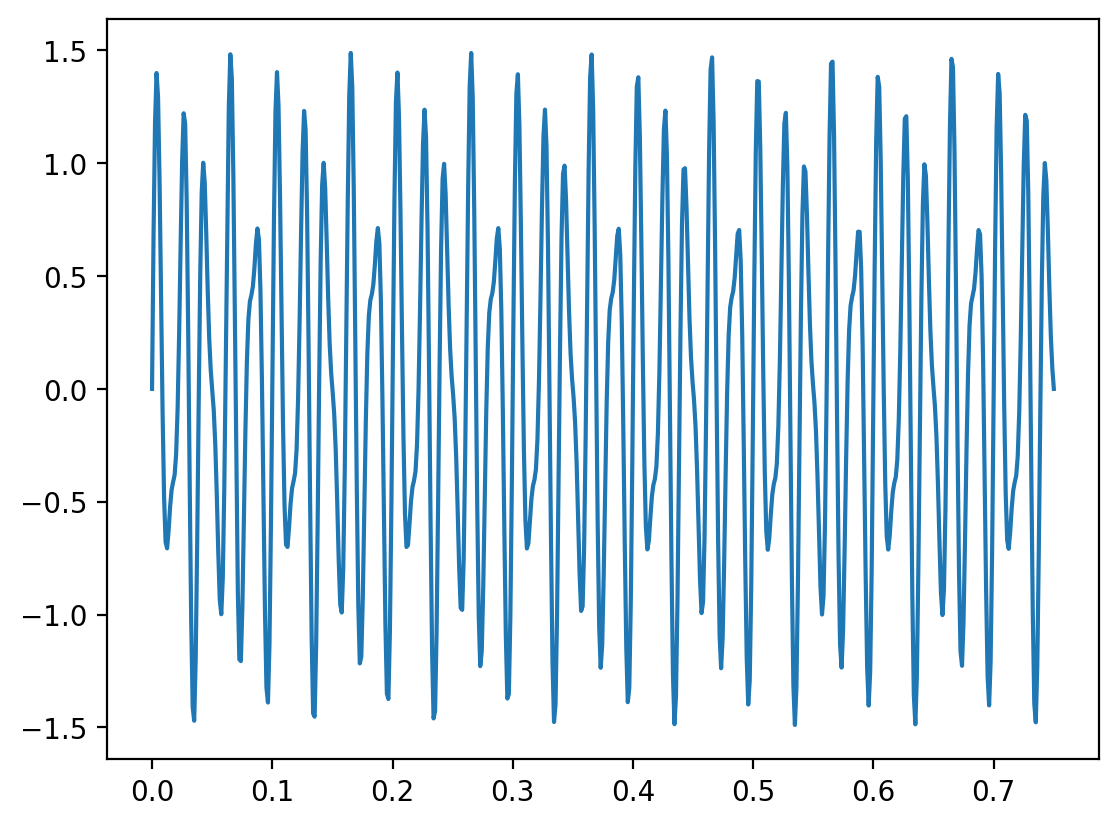

In [41]:
# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
plt.plot(x, y)

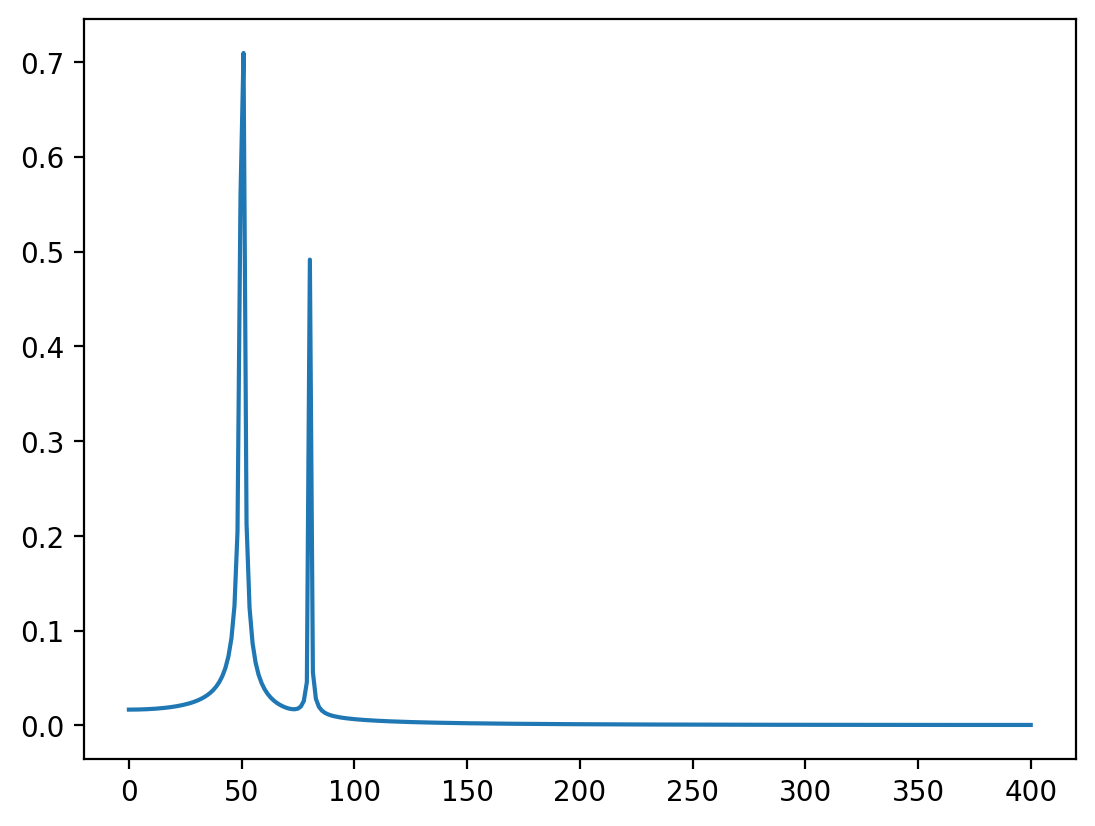

In [42]:
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

20


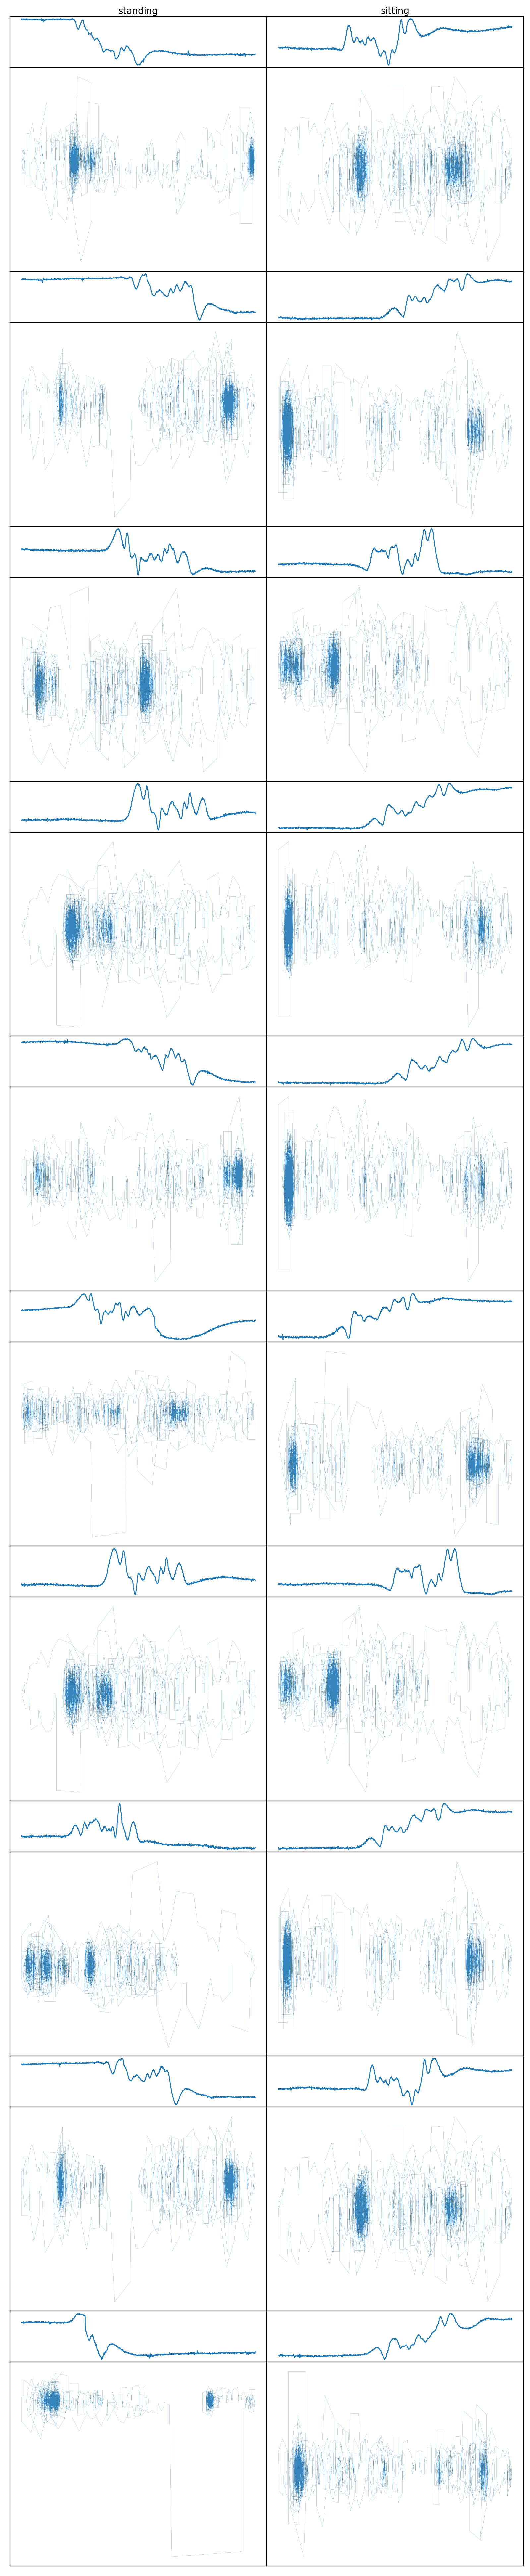

In [32]:
labels = list(df.label.unique())
n_display = 10

single_plot_size = 5

height_ratios = []
for _ in range(n_display):
    height_ratios += [1, 4]
    
print(len(height_ratios))

fig, axes = plt.subplots(
    figsize=(single_plot_size*2, single_plot_size*n_display),
    nrows=len(height_ratios),
    ncols=len(labels),
    height_ratios=height_ratios)

remove_axis_decorations(axes)
fig.subplots_adjust(wspace=0, hspace=0)

for column, label in enumerate(labels):
    for i in range(0, n_display*2, 2):
        
        y = df[df.label==label].iloc[i//2, 1:].values.astype(np.float64)

        ax = axes[i, column]
        x = np.linspace(0, total_time, n)
        ax.plot(x, y, lw=1.0)
        
        ax = axes[i+1, column]

        ax.plot(y, np.gradient(y), alpha=0.9, lw=0.1, )

    ax = axes[0, column]
    ax.text(0.5, 1.1, label,
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)

20


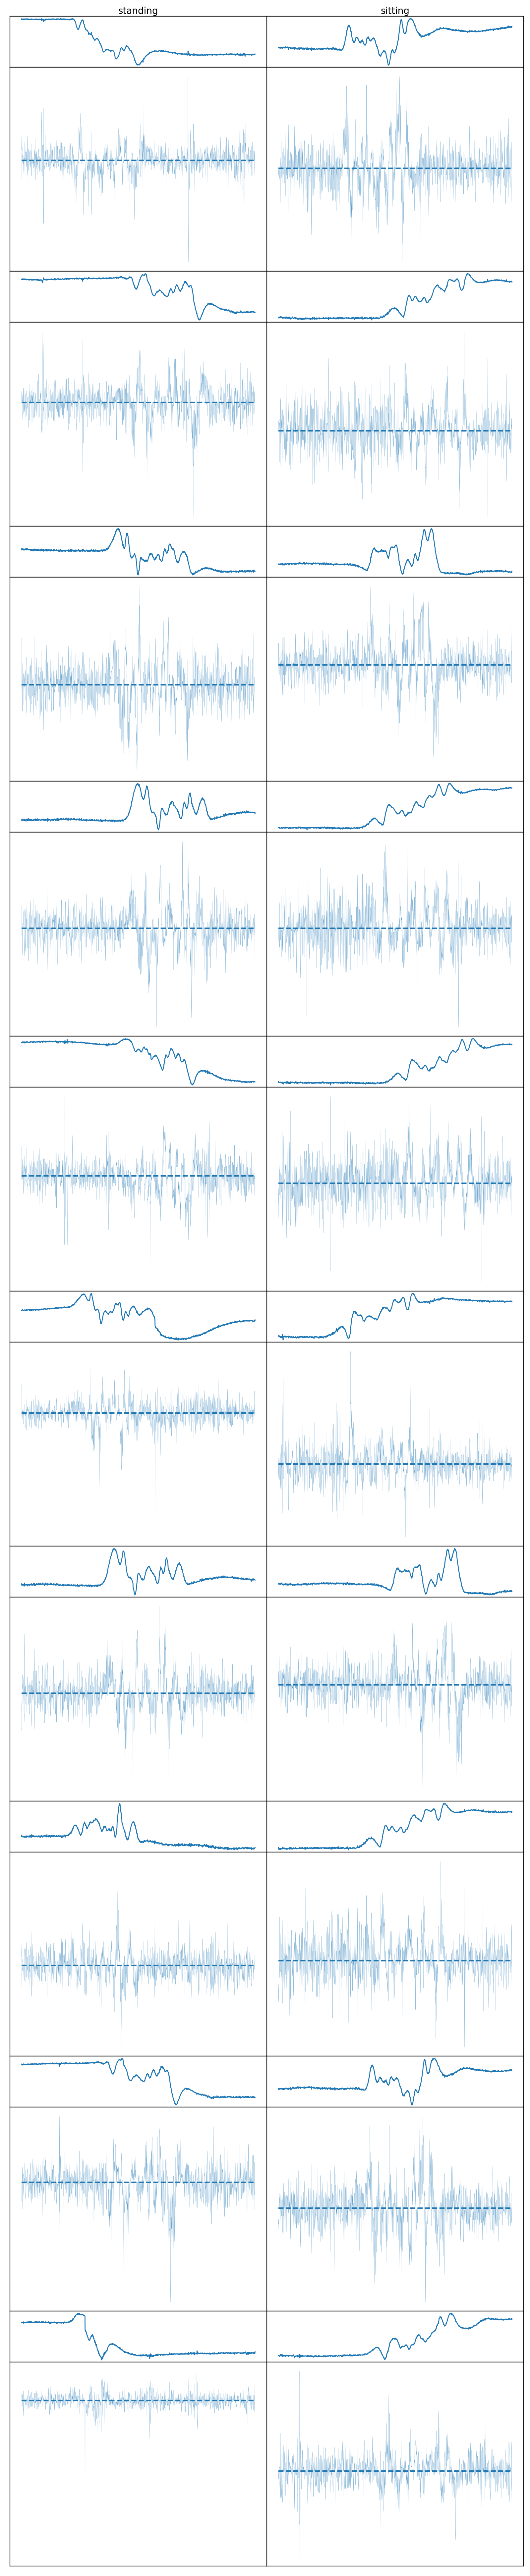

In [37]:
labels = list(df.label.unique())
n_display = 10

single_plot_size = 5

height_ratios = []
for _ in range(n_display):
    height_ratios += [1, 4]
    
print(len(height_ratios))

fig, axes = plt.subplots(
    figsize=(single_plot_size*2, single_plot_size*n_display),
    nrows=len(height_ratios),
    ncols=len(labels),
    height_ratios=height_ratios)

remove_axis_decorations(axes)
fig.subplots_adjust(wspace=0, hspace=0)

for column, label in enumerate(labels):
    for i in range(0, n_display*2, 2):
        
        y = df[df.label==label].iloc[i//2, 1:].values.astype(np.float64)

        ax = axes[i, column]
        x = np.linspace(0, total_time, n)
        ax.plot(x, y, lw=1.0)
        
        ax = axes[i+1, column]
        
        ax.hlines(0, xmin=min(x), xmax=max(x), ls="--")

        ax.plot(x, np.gradient(y), alpha=0.9, lw=0.1, )

    ax = axes[0, column]
    ax.text(0.5, 1.1, label,
            horizontalalignment='center',
            verticalalignment='center',
            transform=ax.transAxes)